# Using ML algorithms to detect potential Parkinson's Disease onset, based on analysis of voice-samples of Patients

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. 

Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.


The data & attributes information for this project is available
at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ The data consists of
those diagnosed with Parkinson Disease and those who do not.

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.

This dataset is courtesy the below & maybe copyrighted by the same.
----------------------------------------------------------------------------------------------------
#### Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008),  'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',  IEEE Transactions on Biomedical Engineering (to appear). ####

Steps to be followed:
1. Load the dataset

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset. (2.5 points)

3. Using univariate & bivariate analysis to check the individual attributes for their basic
statistic such as central values, spread, tails etc. What are your observations? (15
points)

4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

5. Create the model using “entropy” method of reducing the entropy and fit it to training
data. (5 points)

6. Test the model on test data and what is the accuracy achieved. Capture the predicted
values and do a crosstab. (7.5 points)

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
What is the impact on the model accuracy? How does regularization help? (20 points)

8. Next implement the decision tree using Random Forest. What is the optimal number of
trees that gives the best result? (10 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from scipy import stats

## 1. Load the dataset

In [2]:
data = pd.read_csv('parkinsons.data')
#Windows Path:
#data_updrs =pd.read_csv('C:\\Users\\dddas\\Google Drive\\PGP-AIML\\Ensemble Techniques\\Project\\telemonitoring\\parkinsons_updrs.data')
#Mac OS Path
#data_updrs =pd.read_csv('/Users/dddas/Google Drive/PGP-AIML/Ensemble Techniques/Project/telemonitoring/parkinsons_updrs.data')

## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [3]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
data.shape

(195, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe(include='all').T

count unique             top freq        mean          std  \
name               195    195  phon_R01_S42_3    1         NaN          NaN   
MDVP:Fo(Hz)        195    NaN             NaN  NaN     154.229      41.3901   
MDVP:Fhi(Hz)       195    NaN             NaN  NaN     197.105      91.4915   
MDVP:Flo(Hz)       195    NaN             NaN  NaN     116.325      43.5214   
MDVP:Jitter(%)     195    NaN             NaN  NaN  0.00622046   0.00484813   
MDVP:Jitter(Abs)   195    NaN             NaN  NaN  4.3959e-05  3.48219e-05   
MDVP:RAP           195    NaN             NaN  NaN  0.00330641   0.00296777   
MDVP:PPQ           195    NaN             NaN  NaN  0.00344636   0.00275898   
Jitter:DDP         195    NaN             NaN  NaN  0.00991995   0.00890334   
MDVP:Shimmer       195    NaN             NaN  NaN   0.0297091    0.0188569   
MDVP:Shimmer(dB)   195    NaN             NaN  NaN    0.282251     0.194877   
Shimmer:APQ3       195    NaN             NaN  NaN   0.0156642    0.0101532   
Shimmer:APQ5       195    NaN             NaN  NaN   0.0178783    0.0120237   
MDVP:APQ           195    NaN             NaN  NaN   0.0240815    0.0169467   
Shimmer:DDA        195    NaN             NaN  NaN   0.0469926    0.0304591   
NHR                195    NaN             NaN  NaN   0.0248471    0.0404184   
HNR                195    NaN             NaN  NaN      21.886      4.42576   
status             195    NaN             NaN  NaN    0.753846     0.431878   
RPDE               195    NaN             NaN  NaN    0.498536     0.103942   
DFA                195    NaN             NaN  NaN    0.718099    0.0553358   
spread1            195    NaN             NaN  NaN     -5.6844      1.09021   
spread2            195    NaN             NaN  NaN     0.22651    0.0834058   
D2                 195    NaN             NaN  NaN     2.38183     0.382799   
PPE                195    NaN             NaN  NaN    0.206552    0.0901193   

                       min       25%       50%       75%       max  
name                   NaN       NaN       NaN       NaN       NaN  
MDVP:Fo(Hz)         88.333   117.572    148.79   182.769   260.105  
MDVP:Fhi(Hz)       102.145   134.863   175.829   224.206    592.03  
MDVP:Flo(Hz)        65.476    84.291   104.315   140.019    239.17  
MDVP:Jitter(%)     0.00168   0.00346   0.00494  0.007365   0.03316  
MDVP:Jitter(Abs)     7e-06     2e-05     3e-05     6e-05   0.00026  
MDVP:RAP           0.00068   0.00166    0.0025  0.003835   0.02144  
MDVP:PPQ           0.00092   0.00186   0.00269  0.003955   0.01958  
Jitter:DDP         0.00204  0.004985   0.00749  0.011505   0.06433  
MDVP:Shimmer       0.00954  0.016505   0.02297  0.037885   0.11908  
MDVP:Shimmer(dB)     0.085    0.1485     0.221      0.35     1.302  
Shimmer:APQ3       0.00455  0.008245   0.01279  0.020265   0.05647  
Shimmer:APQ5        0.0057   0.00958   0.01347   0.02238    0.0794  
MDVP:APQ           0.00719   0.01308   0.01826    0.0294   0.13778  
Shimmer:DDA        0.01364  0.024735   0.03836  0.060795   0.16942  
NHR                0.00065  0.005925   0.01166   0.02564   0.31482  
HNR                  8.441    19.198    22.085   25.0755    33.047  
status                   0         1         1         1         1  
RPDE               0.25657  0.421306  0.495954  0.587562  0.685151  
DFA               0.574282  0.674758  0.722254  0.761881  0.825288  
spread1           -7.96498   -6.4501  -5.72087  -5.04619  -2.43403  
spread2           0.006274  0.174351  0.218885  0.279234  0.450493  
D2                 1.42329   2.09913   2.36153   2.63646   3.67116  
PPE               0.044539  0.137451  0.194052   0.25298  0.527367

In [7]:
# Checking for NaN values
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

#### *Each column the dataset(there are 24), represents a particular parameter of voice measure. We have data that has been labelled already, i.e. 23 of 31 people whose voice samples form this dataset have Parkinson's Disease & this is highlighted in the "status" column with 0(healthy) & 1(parkinsons'). Thus effectively we have 23 features & 1 label, which is collected for 195 datatpoints, representing voice recordings from 31 people, of which 23 have Parkinson's Disease.*

#### *None of the features have any NULL value, as we have seen above. However, we need to find out if there are any other form of missing data in the dataset. This we will achieve when we conduct individual feature level EDA.* 

#### *All the features have data in floating-point format, while the NAME feature is object type. As this represents the patient name, we will be dropping this column going forward. The STATUS column represents the label, and it's in integer format having values 0 & 1*

#### *The dataset is skewed towards PATIENTS wherein we have 23 PATIENTS (out of 31)*


### *Let us now try to perform some EDA on each individual feature/voice measure. As none of the columns in the dataset have any NULL values. We will proceed with our subsequent EDA after splitting the data into FEATURES & LABELS, and thereon dropping the feature NAME (as it's not a contributing factor in determining Parkinsons')*

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [8]:
#Creating a backup of the data
data_bkup = data.copy()

data.drop('name',axis=1,inplace=True)
y=data.pop('status')
print ("Shape of dataset after dropping NAME & STATUS: ",data.shape)
print ("Shape of LABEL dataset: ",y.shape)

Shape of dataset after dropping NAME & STATUS:  (195, 22)
Shape of LABEL dataset:  (195,)


#### *Thus there are now 22 features in the dataset, with 195 records. The label has been stored in a seperate dataframe: y. Since all the features are CONTINUOS & NUMERIC, we will first visit DISTRIBUTION PLOTS in UNIVARIATE ANALYSIS*

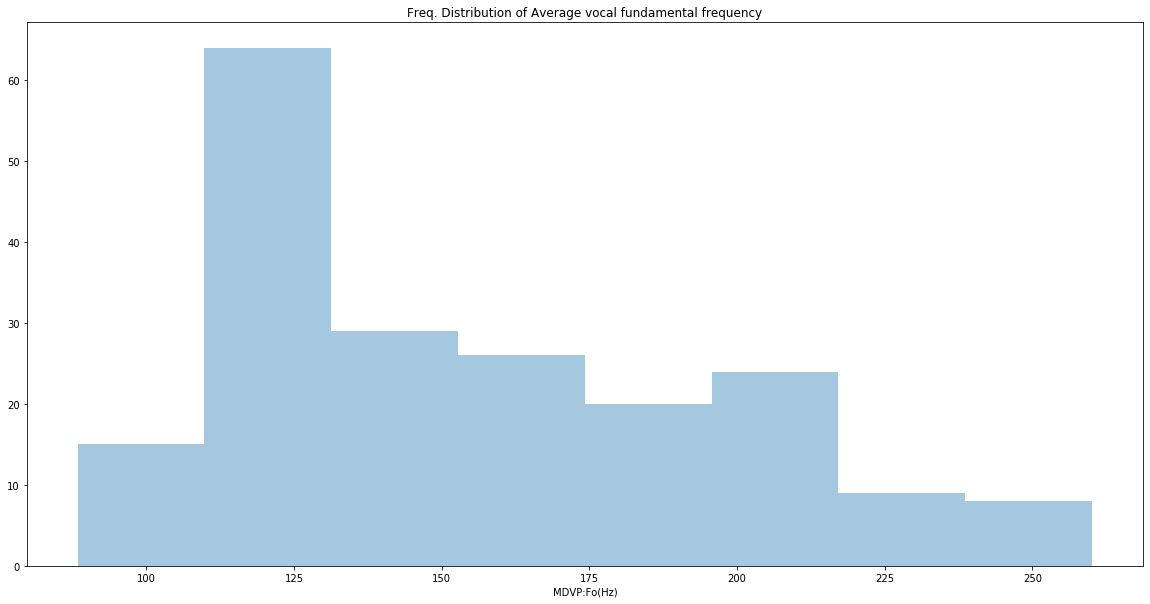

In [9]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Average vocal fundamental frequency')
sns.distplot(data['MDVP:Fo(Hz)'],kde=False)

#### *This feature represents: "Average vocal fundamental frequency".*
#### *The figure indicates a left-skewed distribution, with bi-modal distribution. The highest count is recorded for the range of 120-130Hz, post which the data keeps dropping, and only slightly picks-up at the range of 200 Hz*
#### *We will next see the scatter plot b/w this feature & the label to see if there is any trends between the two*

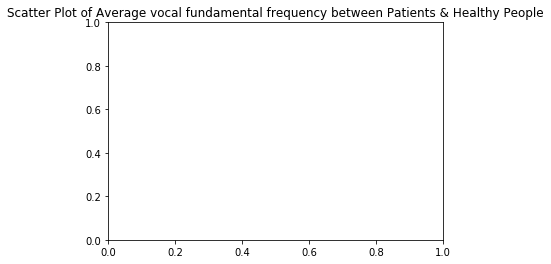

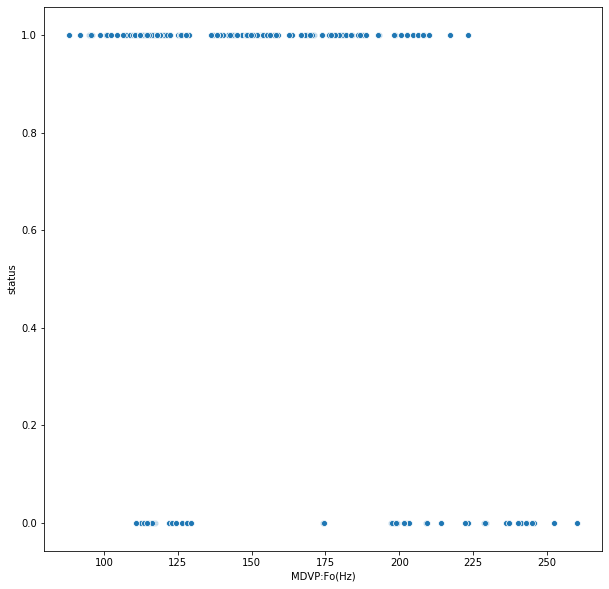

In [10]:
plt.title('Scatter Plot of Average vocal fundamental frequency between Patients & Healthy People')
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['MDVP:Fo(Hz)'],y=y)

#### *From the above plot, we can see that although there is some overlap between the 2 status' (0-Healthy, 1-Parkinsons), there is clear missing data in the higher frequencies. While healthy people have not recorded much data (an ourlier maybe at 175Hz) in the 130-180Hz range, there is significant number of patients in the same range. Similarly, another insight that we can draw is that there are no healthy people in the range below 100Hz, but this is significant in the patients*

#### *Thus we can say that HEALTHY people have vocal-ranges b/w 110-130 & then 180 Hz onwards, PATIENTS don't have any vocal-range beyond 225 Hz*

#### *As this dataset is skewed towards PATIENTS & both PATIENTS & HEALTHY people have VOCAL FREQUENCY in 125 Hz range, we have a very HIGH PEAK at this value. However since only HEALTHY people have VOCAL FREQUENCY in 200 Hz range, we have a SMALLER PEAK here*

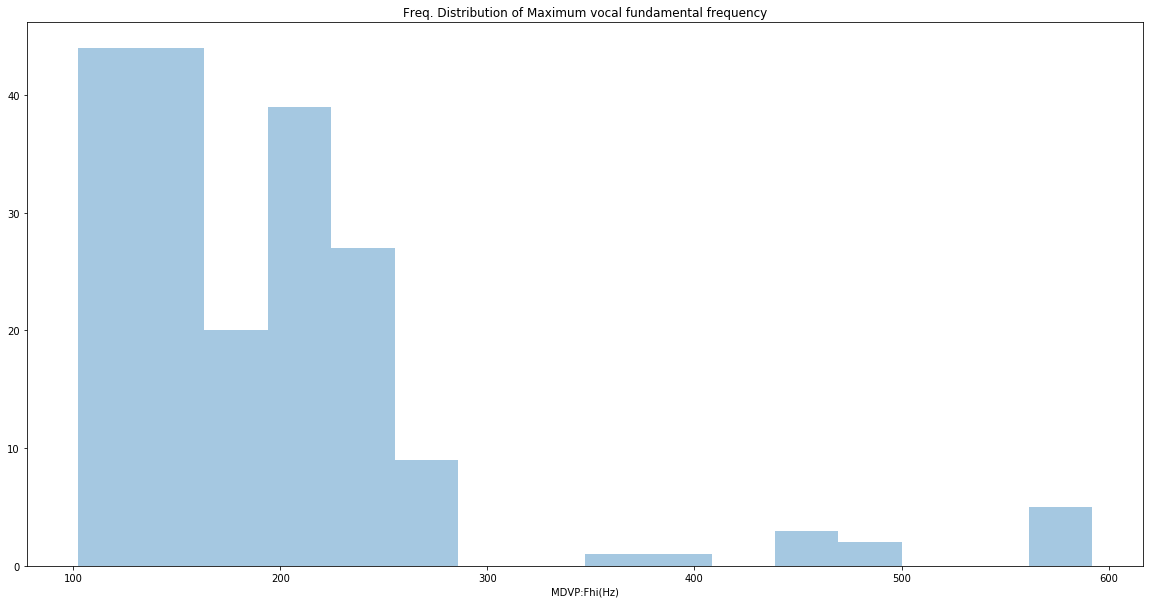

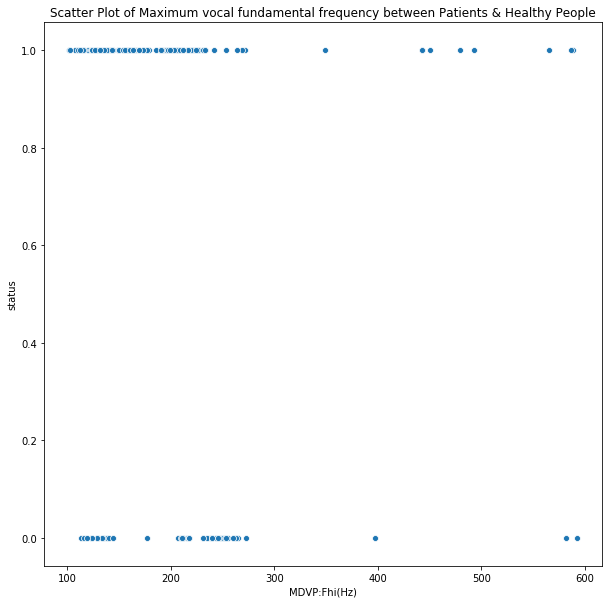

In [11]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Maximum vocal fundamental frequency')
sns.distplot(data['MDVP:Fhi(Hz)'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Maximum vocal fundamental frequency between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Fhi(Hz)'],y=y)

#### *This feature represents: "Maximum vocal fundamental frequency".*
#### *From the above plots we can conclude that majority of the population, both HEALTHY & PATIENTS, have Maximum Vocal Frequency in the range of 100-300 Hz. Some of the PATIENTS are capable of having a maximum vocal freq. above 300Hz, something which is rare for HEALTHY people. While the distinct PEAK at 400Hz is contributed by HEALTHY people, the PEAKS at 500 & 600Hz is completely due to PATIENTS*

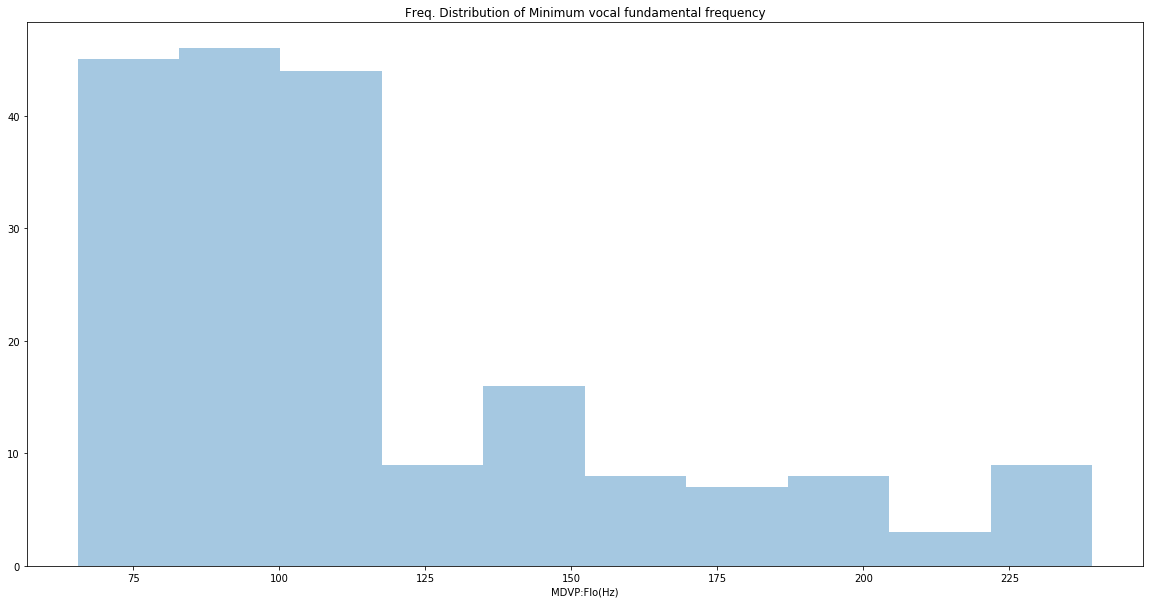

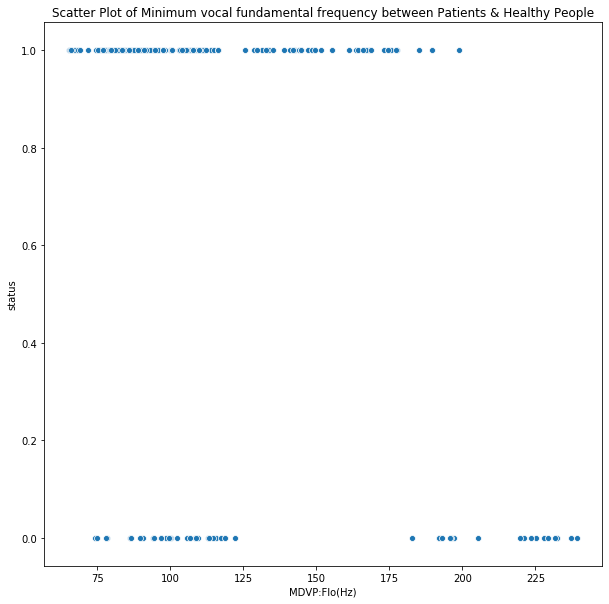

In [12]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Minimum vocal fundamental frequency')
sns.distplot(data['MDVP:Flo(Hz)'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Minimum vocal fundamental frequency between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Flo(Hz)'],y=y)

#### *This feature represents: "Minimum vocal fundamental frequency".*

#### *As we can see from the plot, there is high-peak & over-lap in frequency in the ranges: 70-120Hz, between PATIENTS & HEALTHY people. While PATIENTS have a LOWER min. freq., HEALTHY people have a HIGHER min. freq. In addition, there is a distinct gap in freq. range of 125-180Hz for HEALTHY people. Thus majority of the people*

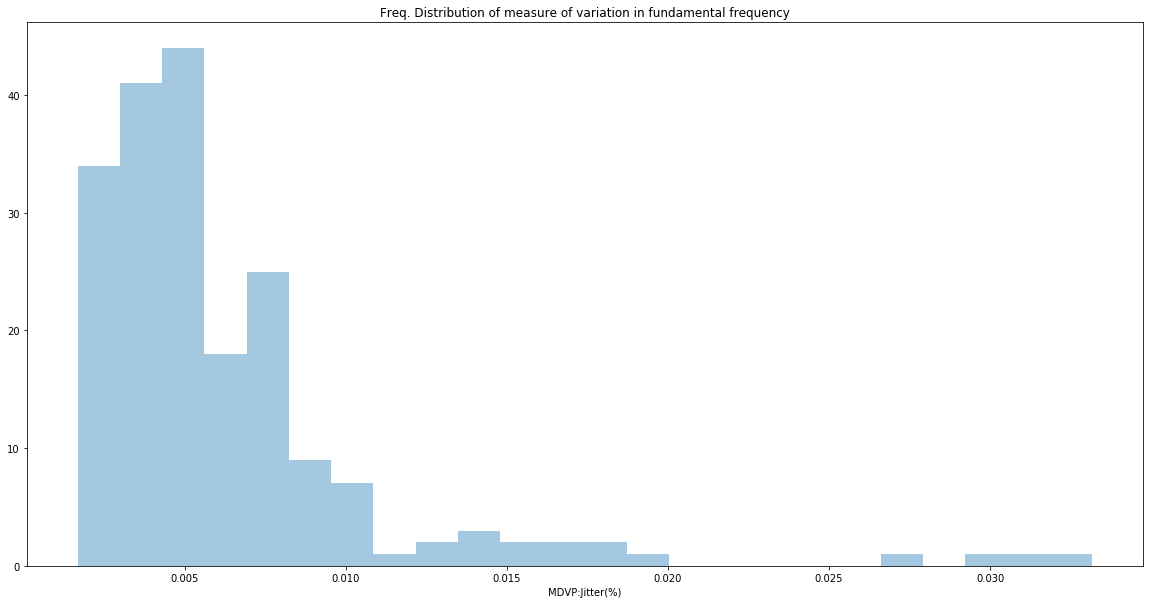

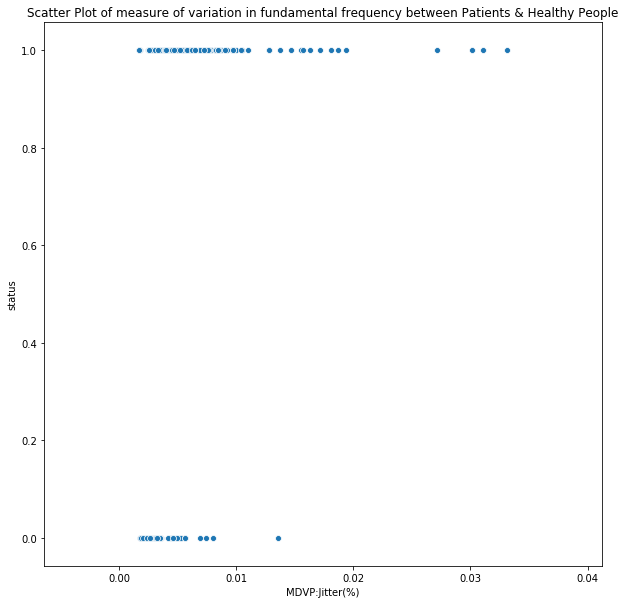

In [13]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of measure of variation in fundamental frequency')
sns.distplot(data['MDVP:Jitter(%)'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of measure of variation in fundamental frequency between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Jitter(%)'],y=y)

#### *This feature represents: "Measure of variation in fundamental frequency, as a JITTER %age".*

#### *As we can see from the above, there is overlap in the JITTER %age range of 0-10% between both PATIENTS & HEALTHY people, beyond which the spectrum is solely dominated by PATIENTS.*

#### *Thus HEALTHY people demonstrate very neglible & low %age JITTER in their fundamental frequency, while PATIENTS demonstrate a wide-range of JITTER*

#### *Lastly, there seems to be some form of positive correlation, as the plot distribution shows a forward slope, with PATIENTS showing higher MDVP.Jitter(%) than HEALTHY people *

(-1e-05, 0.00025)

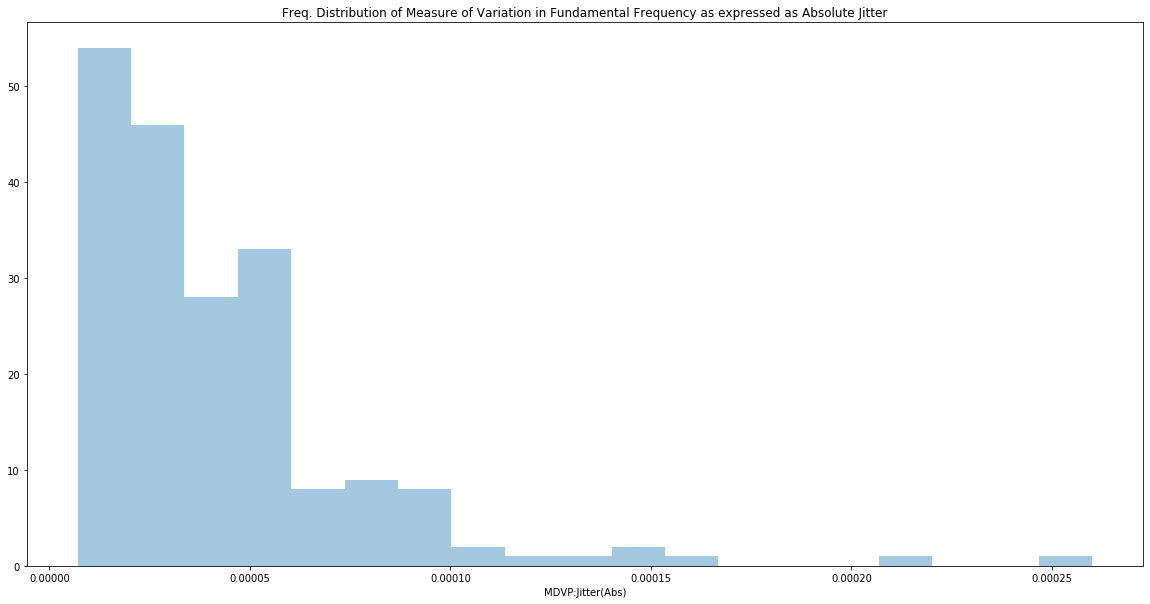

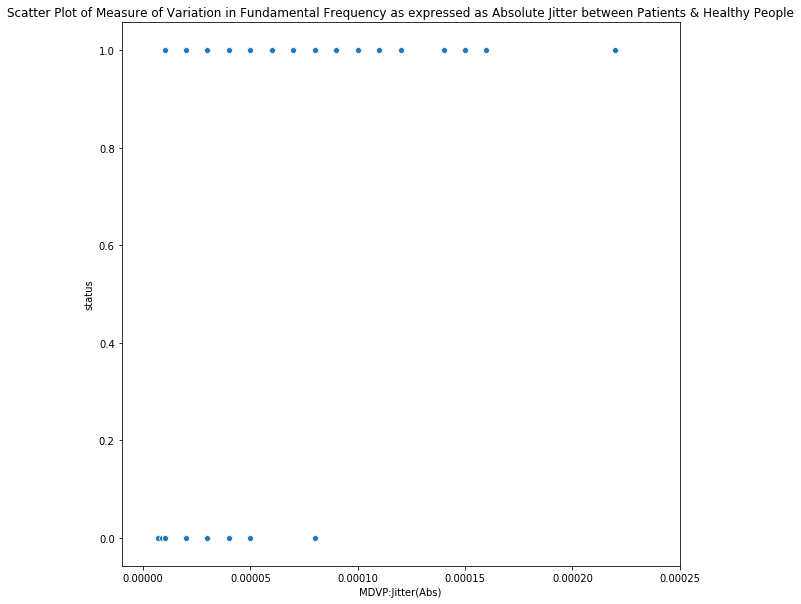

In [14]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Measure of Variation in Fundamental Frequency as expressed as Absolute Jitter')
sns.distplot(data['MDVP:Jitter(Abs)'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Measure of Variation in Fundamental Frequency as expressed as Absolute Jitter between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Jitter(Abs)'],y=y)
plt.xlim(-0.00001, 0.00025)

#### *This feature represents: "Absolute values of Jitter as a measure of variation in fundamental frequency".*

#### *From the above plot, we observe that absolute values of Jitter, max out at less than 0.00010 for HEALTHY people, but extend till 0.00025 for PATIENTS. Most HEALTHY people have this value end at 0.00005, while outlier cases extend till ~0.00008. However for PATIENTS this extends beyond 0.00015, with outliers at ~0.00023*

#### *The outliers are marked by the 2 peaks in the freq. distribution plot, while we notice that there is a steady & continuous descend from the peak at 0.00000. Thus for both PATIENTS & HEALTHY people, the concentration is around 0.00000*

(0.0, 0.025)

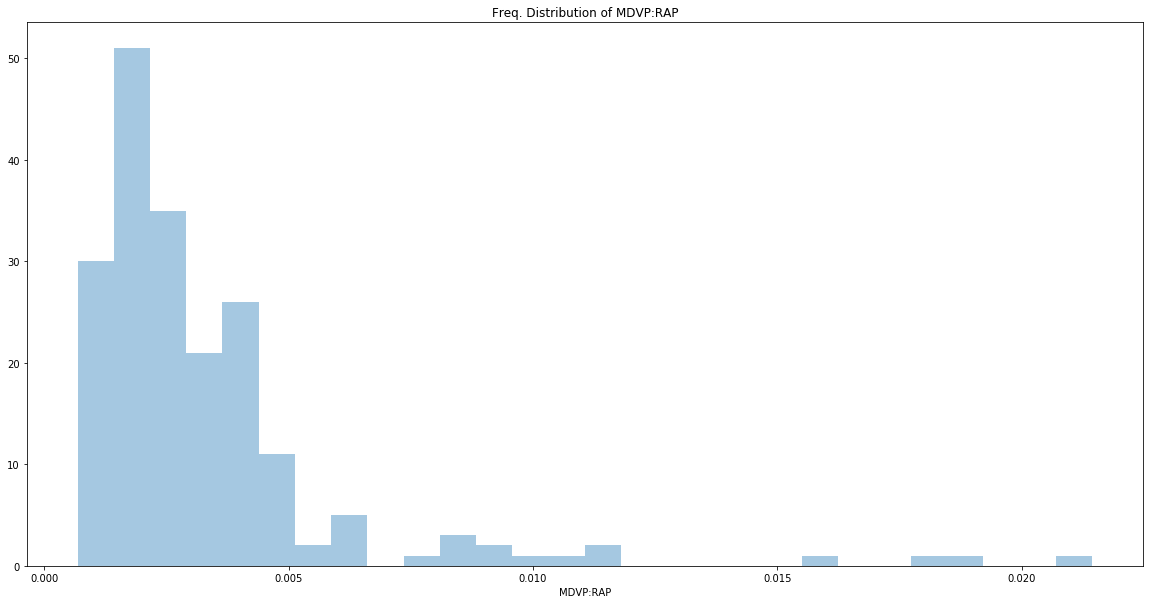

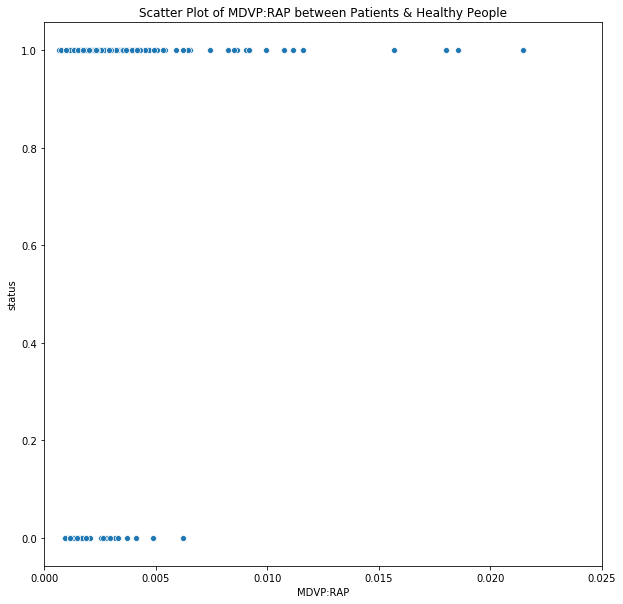

In [15]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of MDVP:RAP')
sns.distplot(data['MDVP:RAP'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of MDVP:RAP between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:RAP'],y=y)
plt.xlim(0.000, 0.025)

#### *From the above plot, we observe that MDVP.RAP values for HEALTHY people has lower values than that for PATIENTS. Although there is considerable over-lap between the 2 groups, PATIENTS tend to show presence of high MDVP.RAP values, something which is absent in HEALTHY people.*

#### *The outliers are marked by the 3 peaks in the freq. distribution plot, while we notice that there is a steady & continuous descend from 0.000. We can think that the intermittent peaks in the descent is being caused by presence of PATIENTS in the over-lap region of 0.000-0.005*

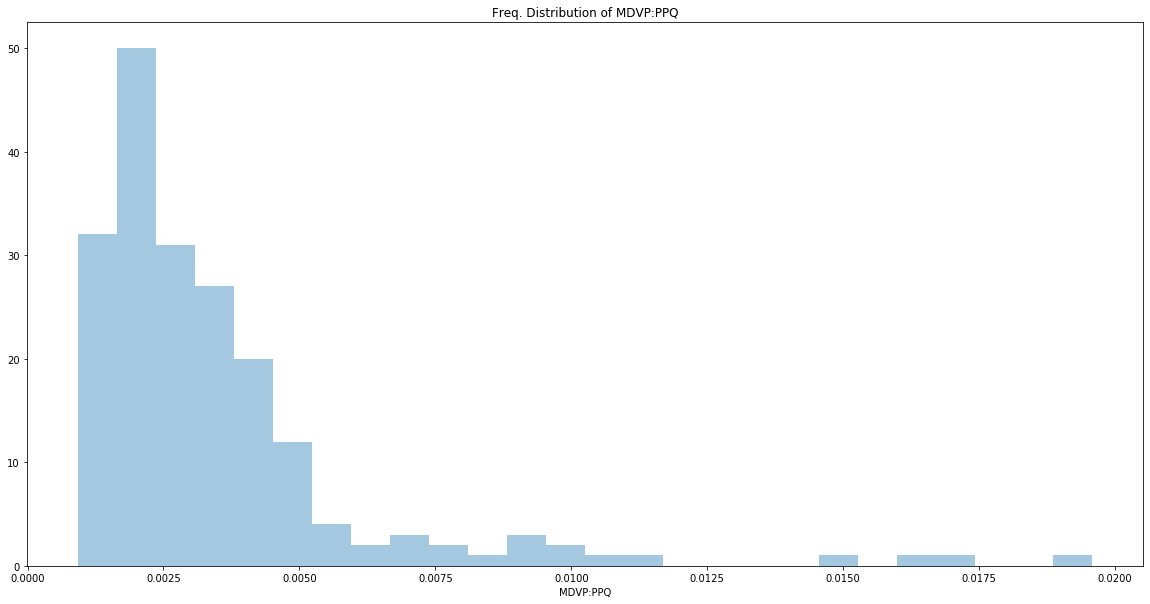

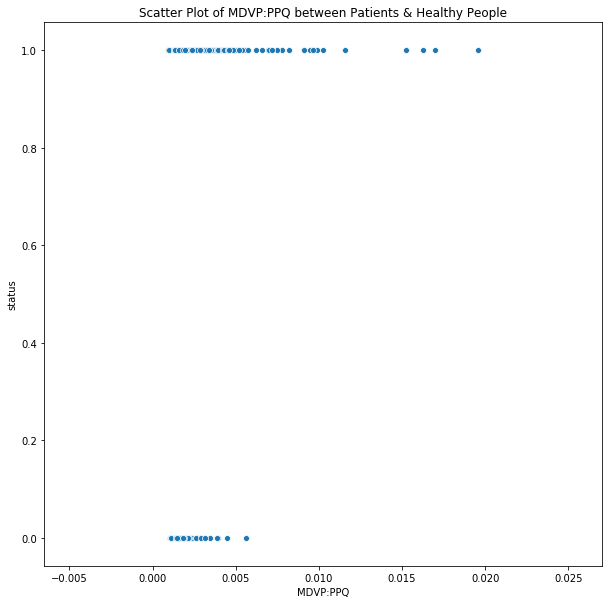

In [16]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of MDVP:PPQ')
sns.distplot(data['MDVP:PPQ'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of MDVP:PPQ between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:PPQ'],y=y)

#### *From the above plot, we observe that MDVP.PPQ values for HEALTHY people has lower values than that for PATIENTS. Although there is considerable over-lap between the 2 groups, PATIENTS tend to show presence of high MDVP.PPQ values, something which is absent in HEALTHY people.*

#### *The outliers are marked by the 3 peaks in the freq. distribution plot at the end, while we notice that there is a steady & continuous descend from 0.0025. Thus for both PATIENTS & HEALTHY people, the concentration is around 0.0025*

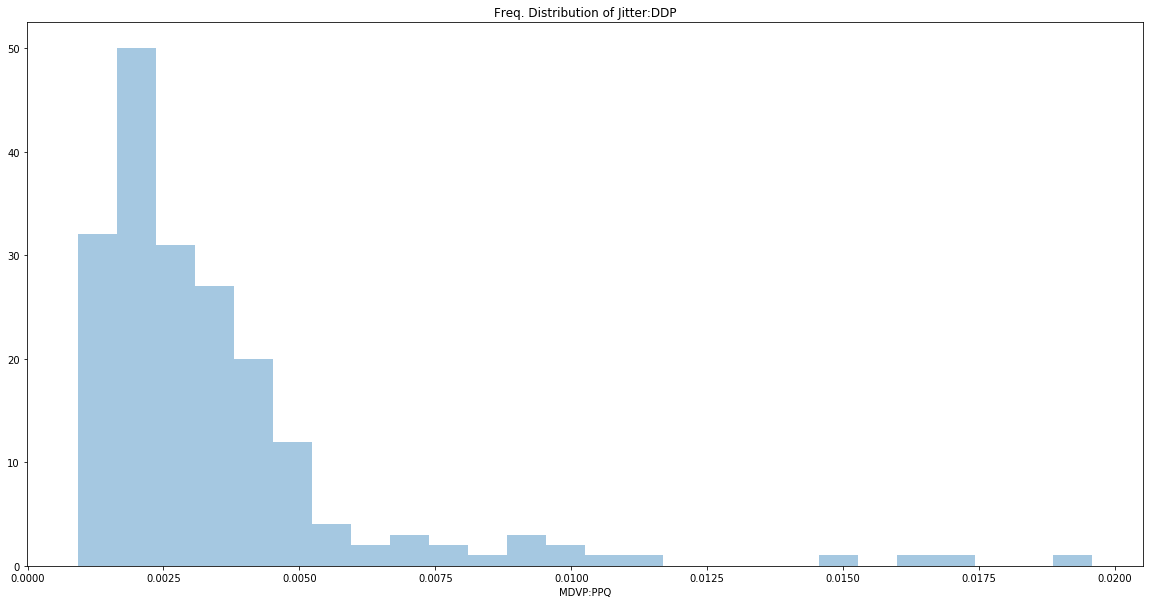

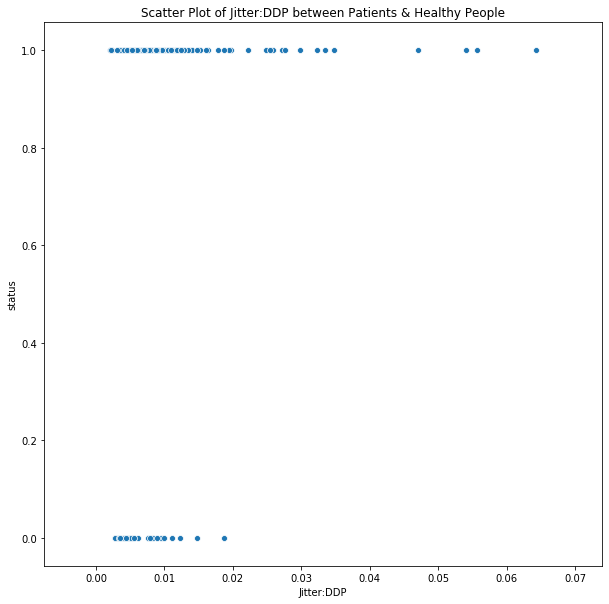

In [17]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Jitter:DDP')
sns.distplot(data['MDVP:PPQ'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Jitter:DDP between Patients & Healthy People')
sns.scatterplot(x=data['Jitter:DDP'],y=y)

#### *From the above plot, we observe that jitter.DDP values for HEALTHY people has lower values than that for PATIENTS. Although there is considerable over-lap between the 2 groups, PATIENTS tend to show presence of high jitter.DDP values, something which is absent in HEALTHY people.*

#### *The outliers are marked by the 3 peaks in the freq. distribution plot at the end, while we notice that there is a steady & continuous descend from 0.0025. Thus for both PATIENTS & HEALTHY people, the concentration is around 0.0025*

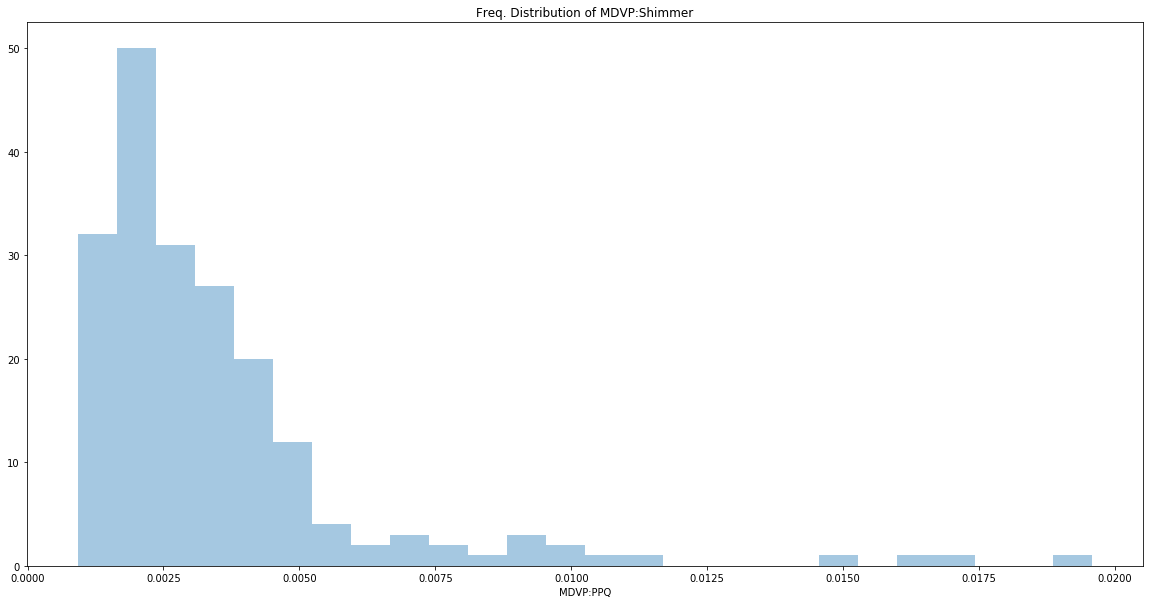

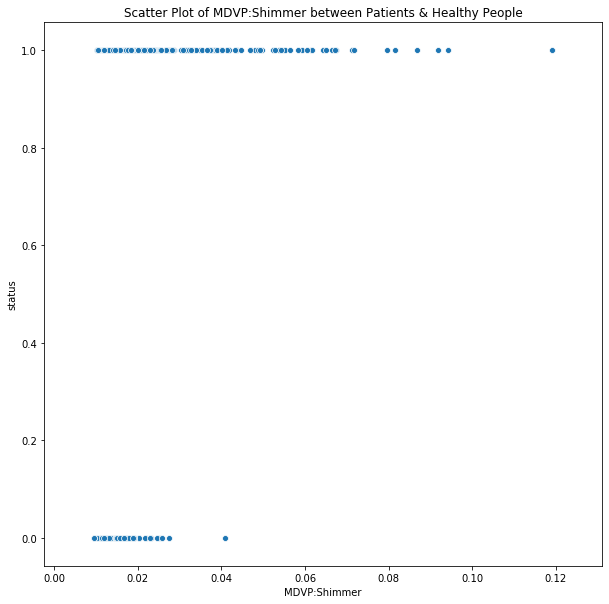

In [18]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of MDVP:Shimmer')
sns.distplot(data['MDVP:PPQ'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of MDVP:Shimmer between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Shimmer'],y=y)

#### *From the above plot, we observe that MDVP.Shimmer values for HEALTHY people has lower values than that for PATIENTS. Although there is considerable over-lap between the 2 groups, PATIENTS tend to show presence of high MDVP.Shimmer values, something which is absent in HEALTHY people.*

#### *The outliers are marked by the 3 peaks in the freq. distribution plot at the end, while we notice that there is a steady & continuous descend from 0.0025. Thus for both PATIENTS & HEALTHY people, the concentration is around 0.0025*

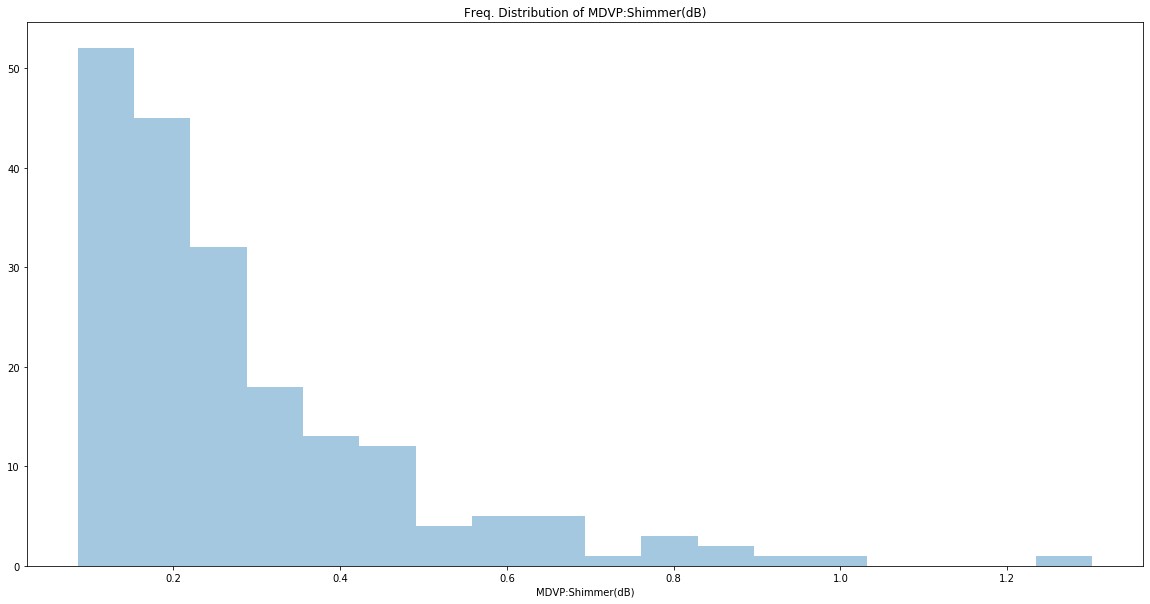

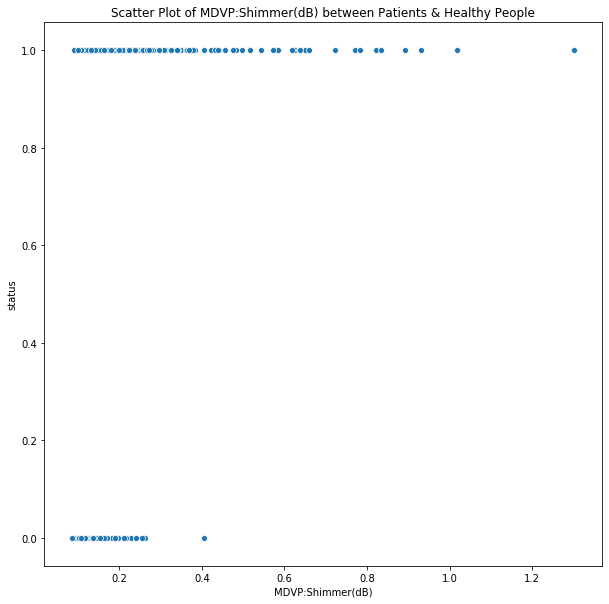

In [19]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of MDVP:Shimmer(dB)')
sns.distplot(data['MDVP:Shimmer(dB)'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of MDVP:Shimmer(dB) between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:Shimmer(dB)'],y=y)

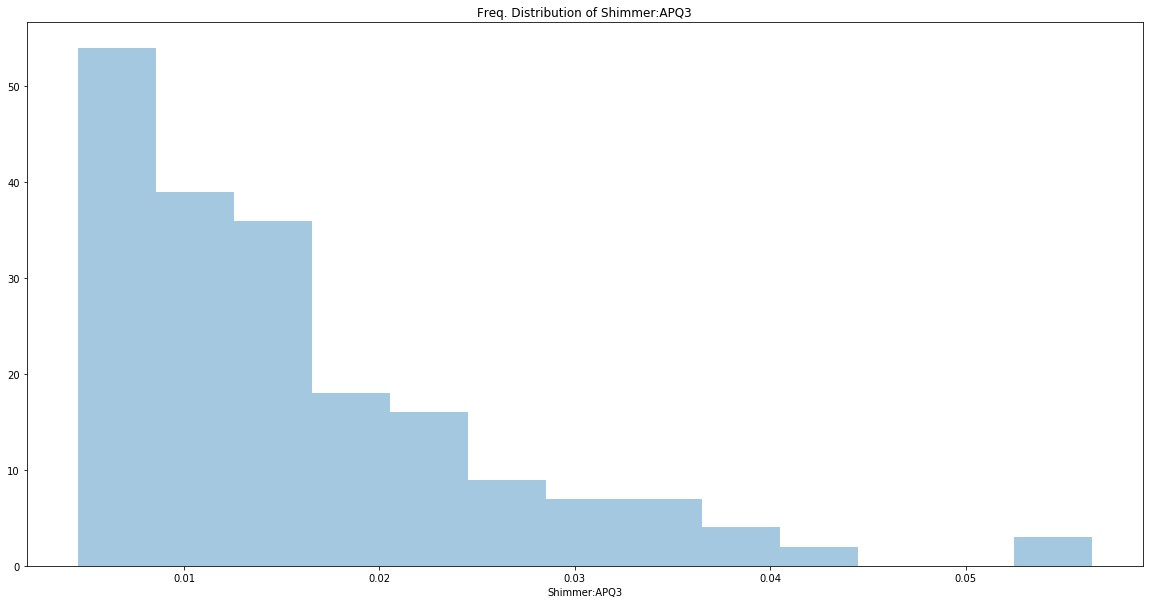

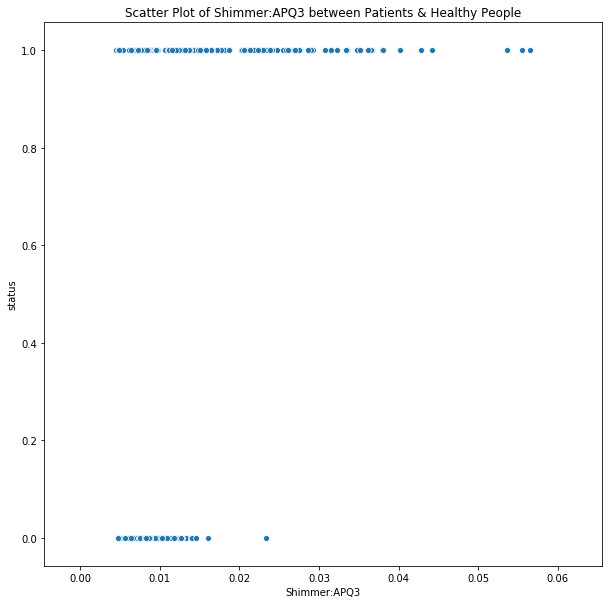

In [20]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Shimmer:APQ3')
sns.distplot(data['Shimmer:APQ3'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Shimmer:APQ3 between Patients & Healthy People')
sns.scatterplot(x=data['Shimmer:APQ3'],y=y)

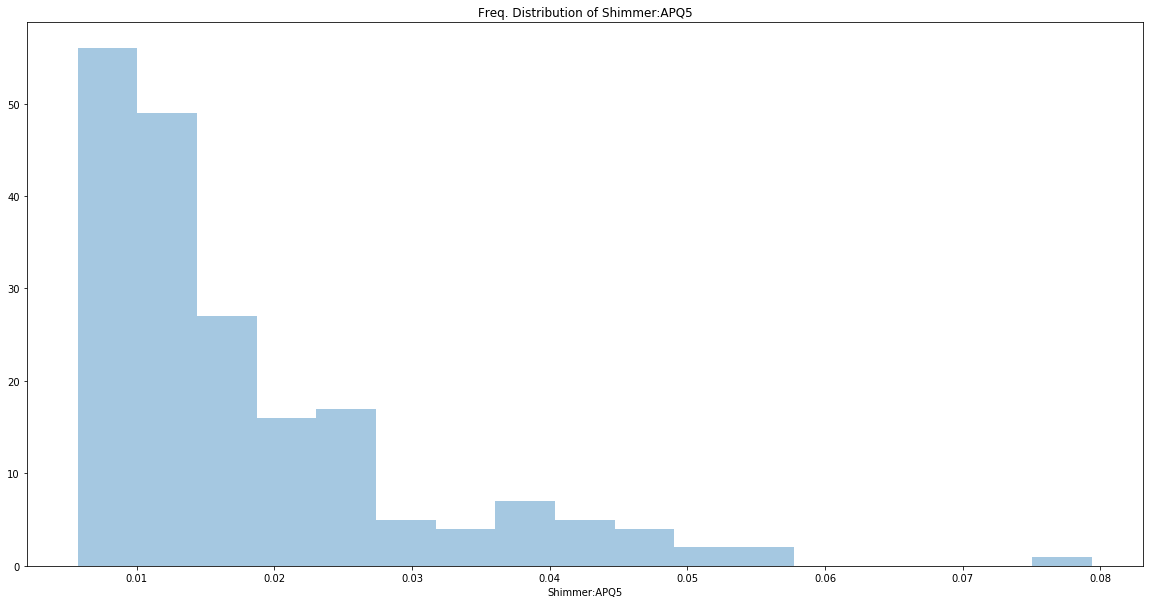

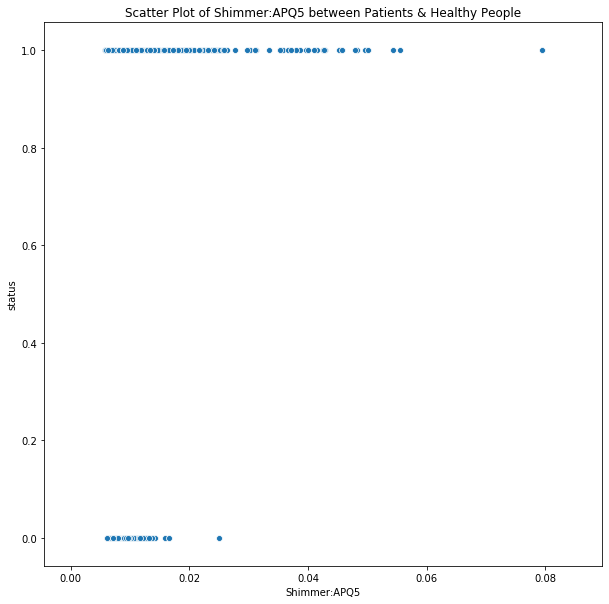

In [21]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Shimmer:APQ5')
sns.distplot(data['Shimmer:APQ5'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Shimmer:APQ5 between Patients & Healthy People')
sns.scatterplot(x=data['Shimmer:APQ5'],y=y)

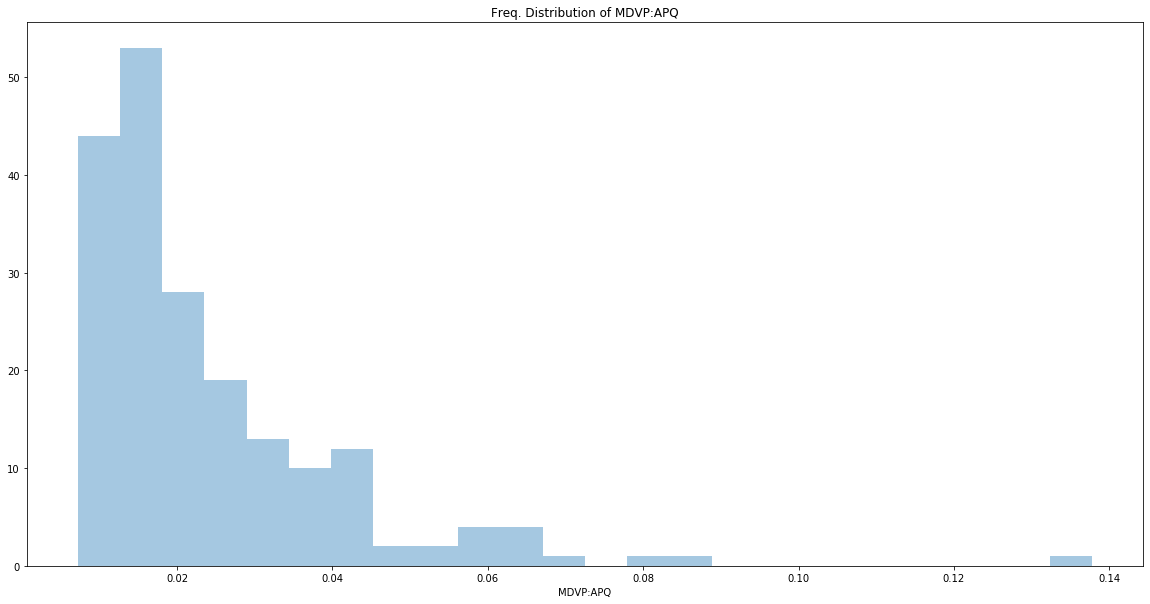

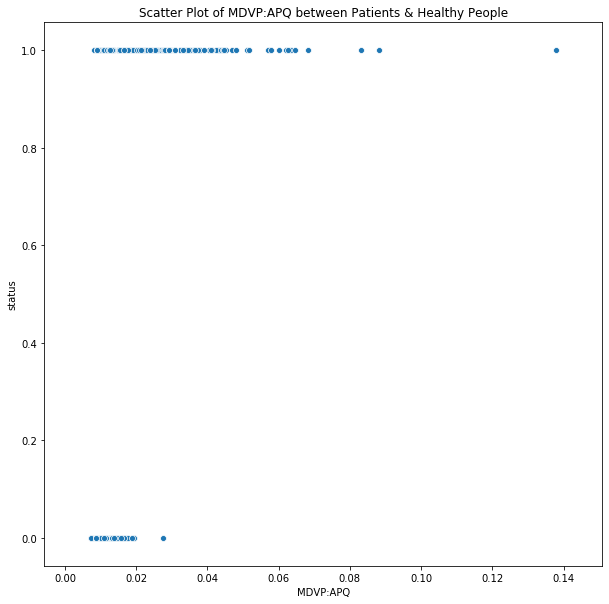

In [22]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of MDVP:APQ')
sns.distplot(data['MDVP:APQ'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of MDVP:APQ between Patients & Healthy People')
sns.scatterplot(x=data['MDVP:APQ'],y=y)

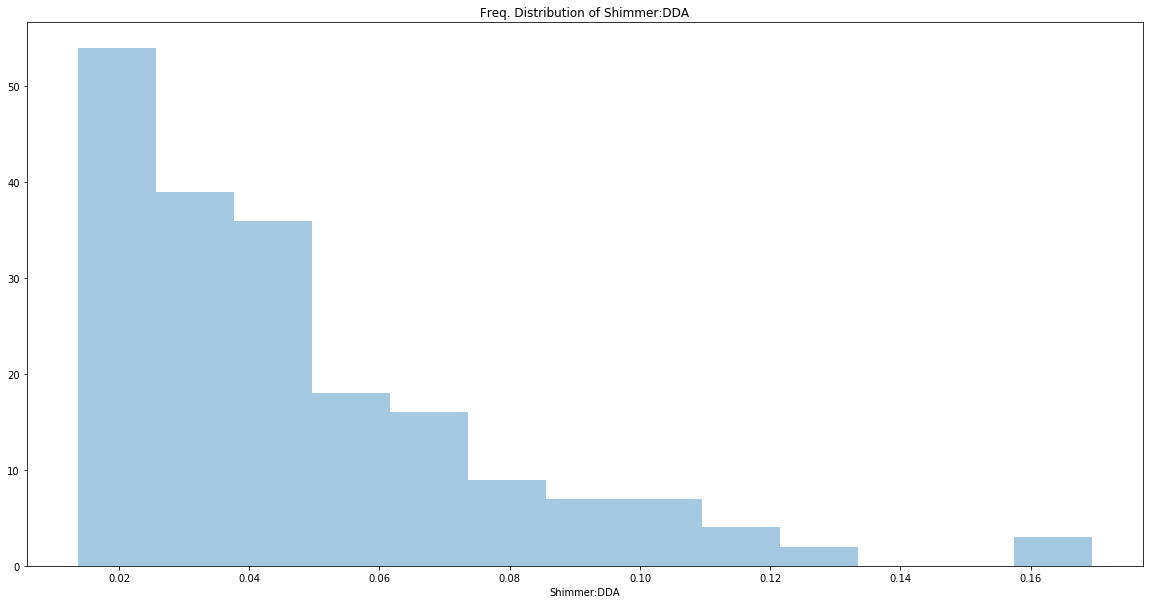

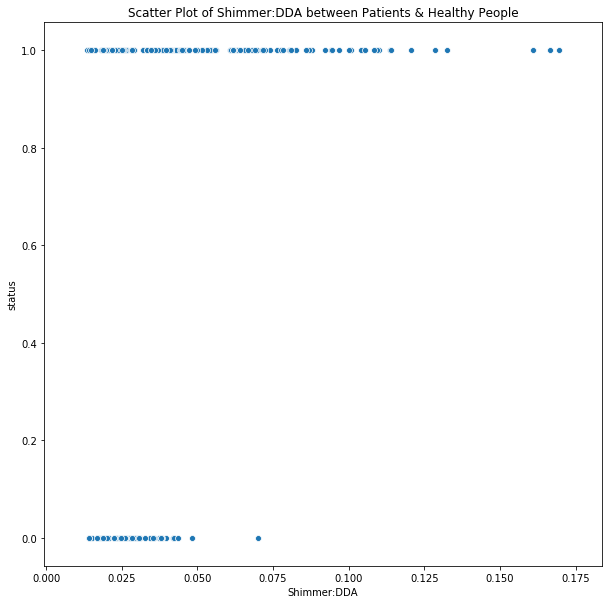

In [23]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of Shimmer:DDA')
sns.distplot(data['Shimmer:DDA'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Shimmer:DDA between Patients & Healthy People')
sns.scatterplot(x=data['Shimmer:DDA'],y=y)

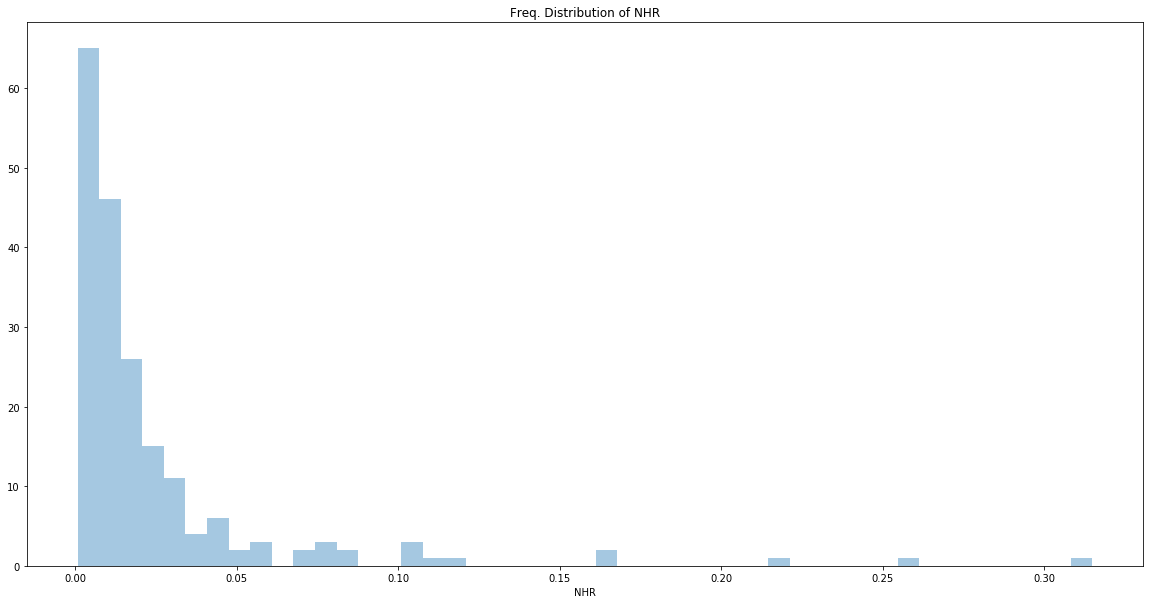

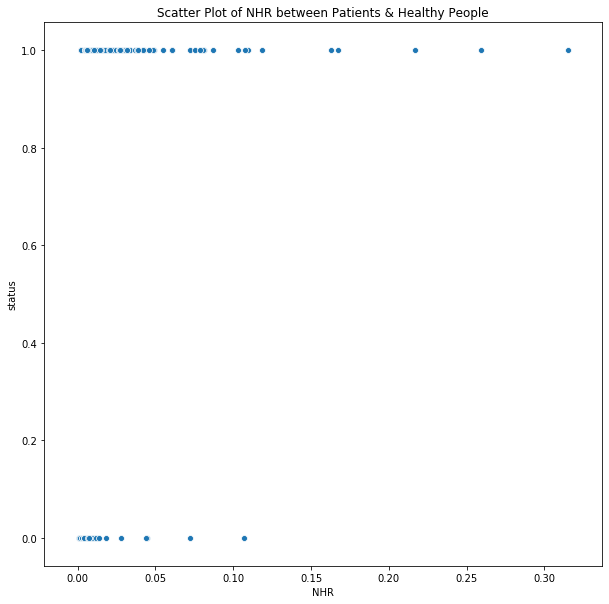

In [24]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of NHR')
sns.distplot(data['NHR'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of NHR between Patients & Healthy People')
sns.scatterplot(x=data['NHR'],y=y)

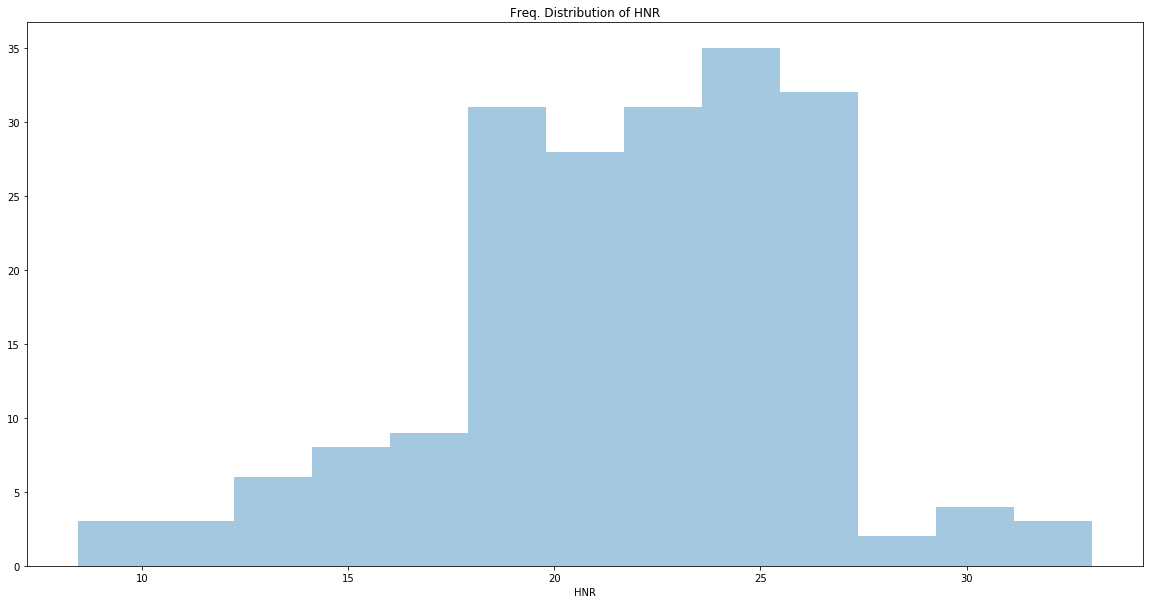

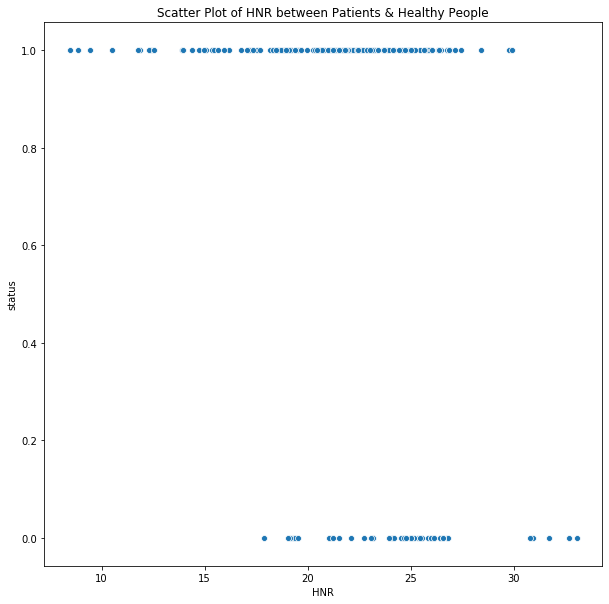

In [25]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of HNR')
sns.distplot(data['HNR'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of HNR between Patients & Healthy People')
sns.scatterplot(x=data['HNR'],y=y)

#### *This plot is showing a reverse trend than what we have seen till now, with HEALTHY people showing a larger value range than PATIENTS.*

#### *The distribution thereby is an almost NORMAL DISTRIBUTION with a slight left skew, which might be due to large proportion of PATIENTS in the dataset.*

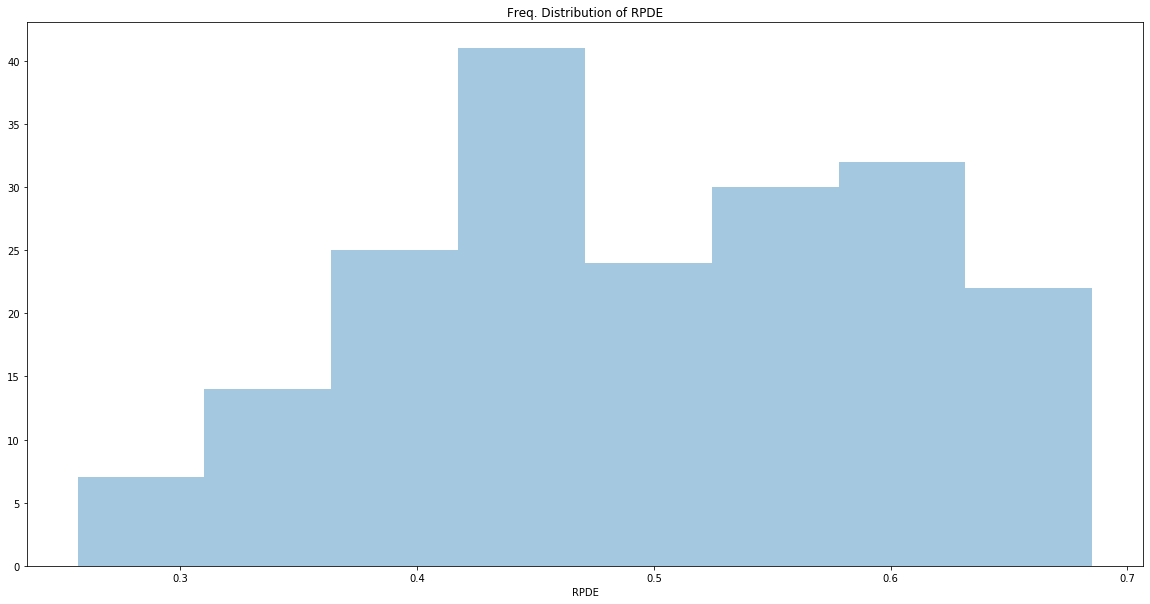

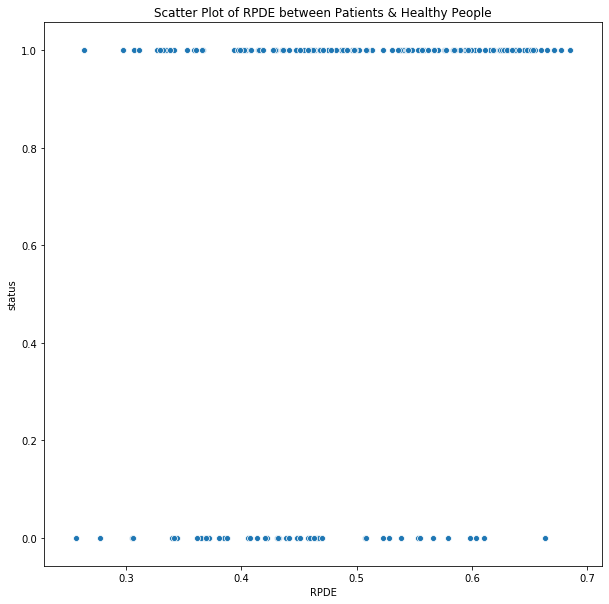

In [26]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of RPDE')
sns.distplot(data['RPDE'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of RPDE between Patients & Healthy People')
sns.scatterplot(x=data['RPDE'],y=y)

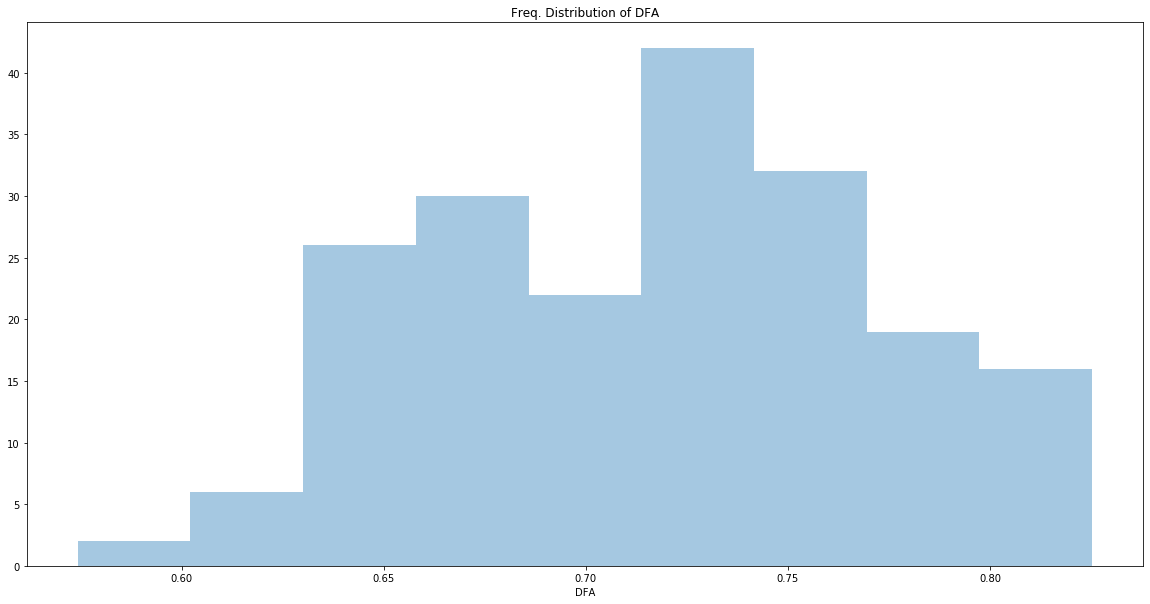

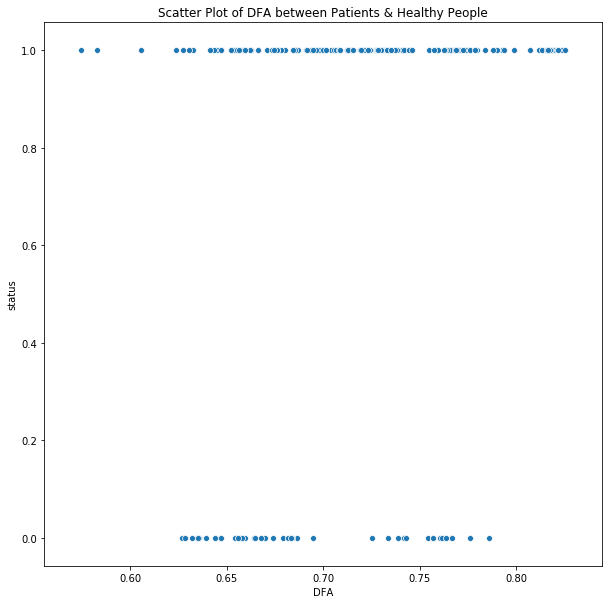

In [27]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of DFA')
sns.distplot(data['DFA'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of DFA between Patients & Healthy People')
sns.scatterplot(x=data['DFA'],y=y)

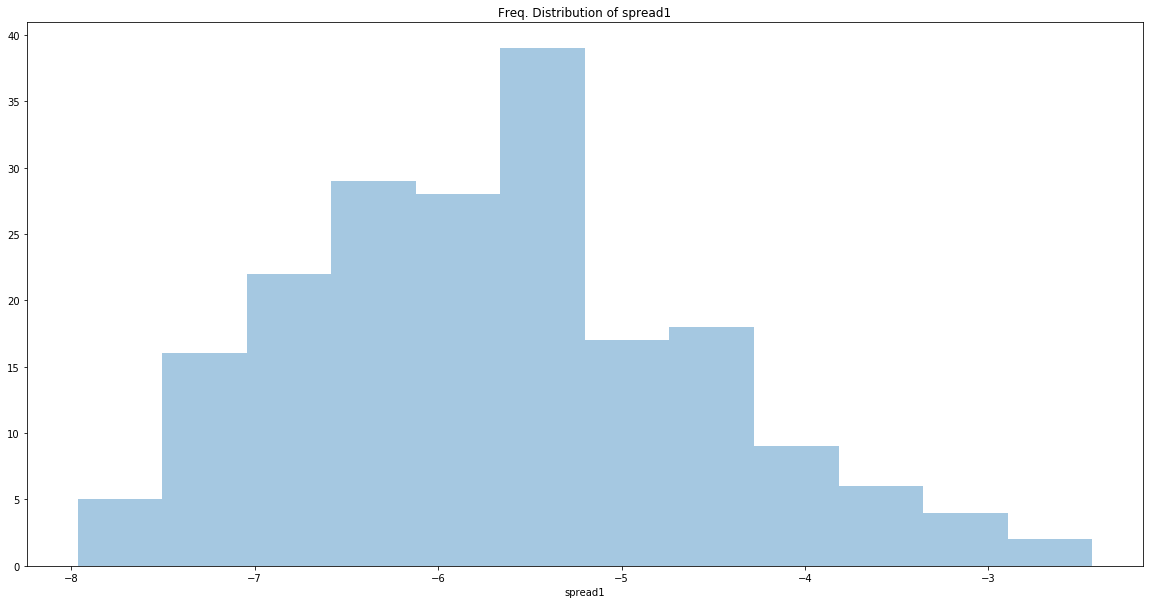

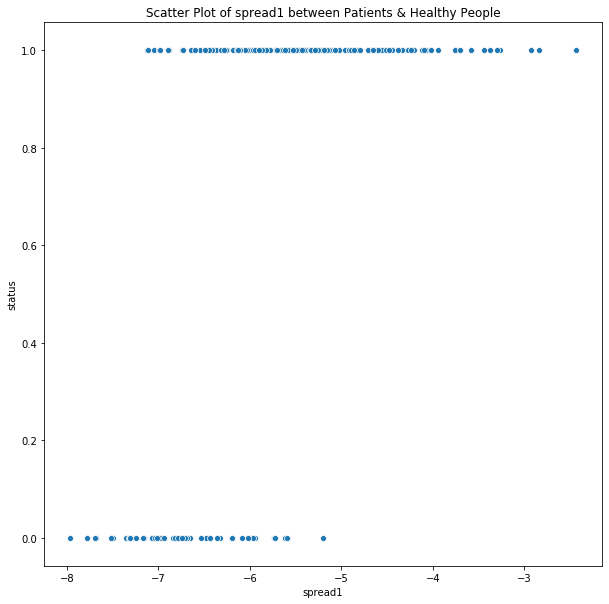

In [28]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of spread1')
sns.distplot(data['spread1'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of spread1 between Patients & Healthy People')
sns.scatterplot(x=data['spread1'],y=y)

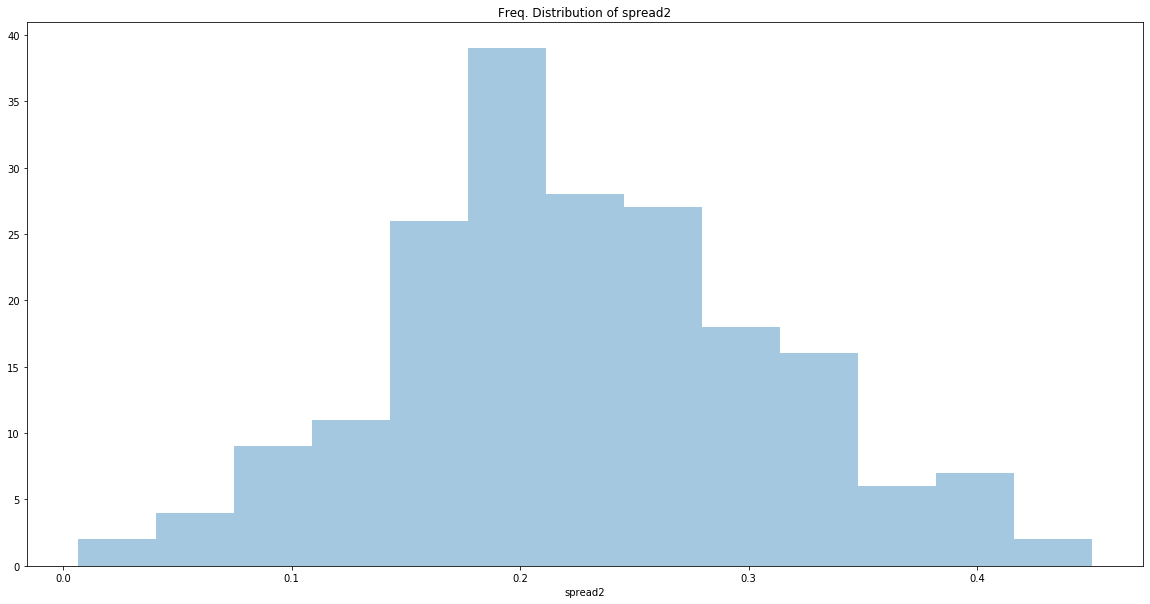

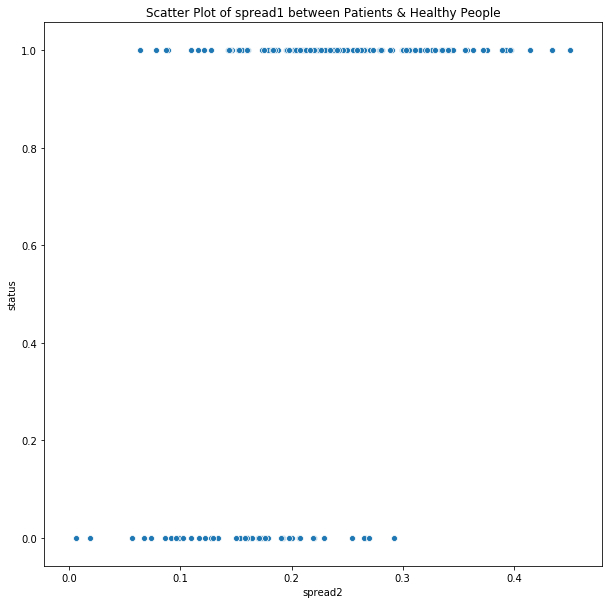

In [29]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of spread2')
sns.distplot(data['spread2'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of spread1 between Patients & Healthy People')
sns.scatterplot(x=data['spread2'],y=y)

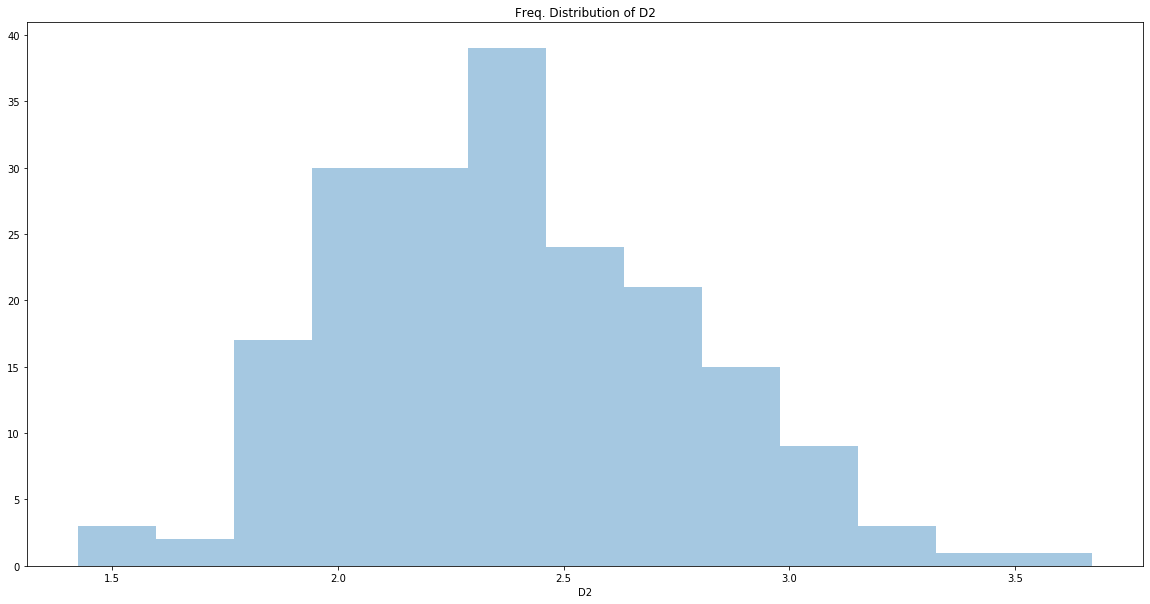

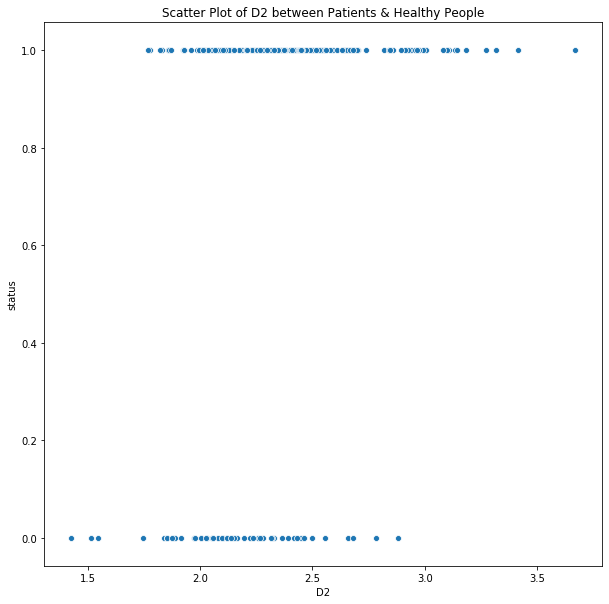

In [30]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of D2')
sns.distplot(data['D2'],kde=False)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of D2 between Patients & Healthy People')
sns.scatterplot(x=data['D2'],y=y)

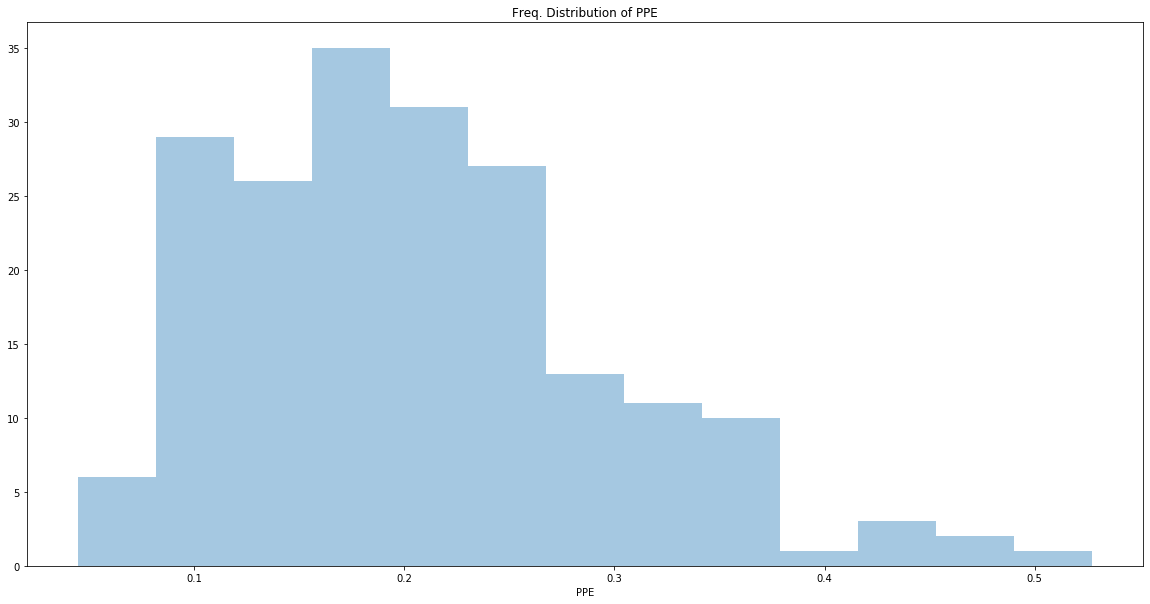

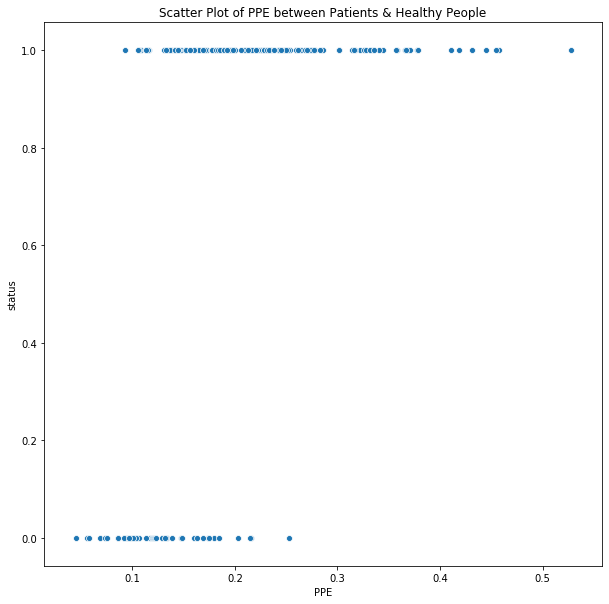

In [31]:
plt.figure(figsize=(20,10))
plt.title('Freq. Distribution of PPE')
sns.distplot(data['PPE'],kde=False,)

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of PPE between Patients & Healthy People')
sns.scatterplot(x=data['PPE'],y=y)

<Figure size 2880x2880 with 0 Axes>

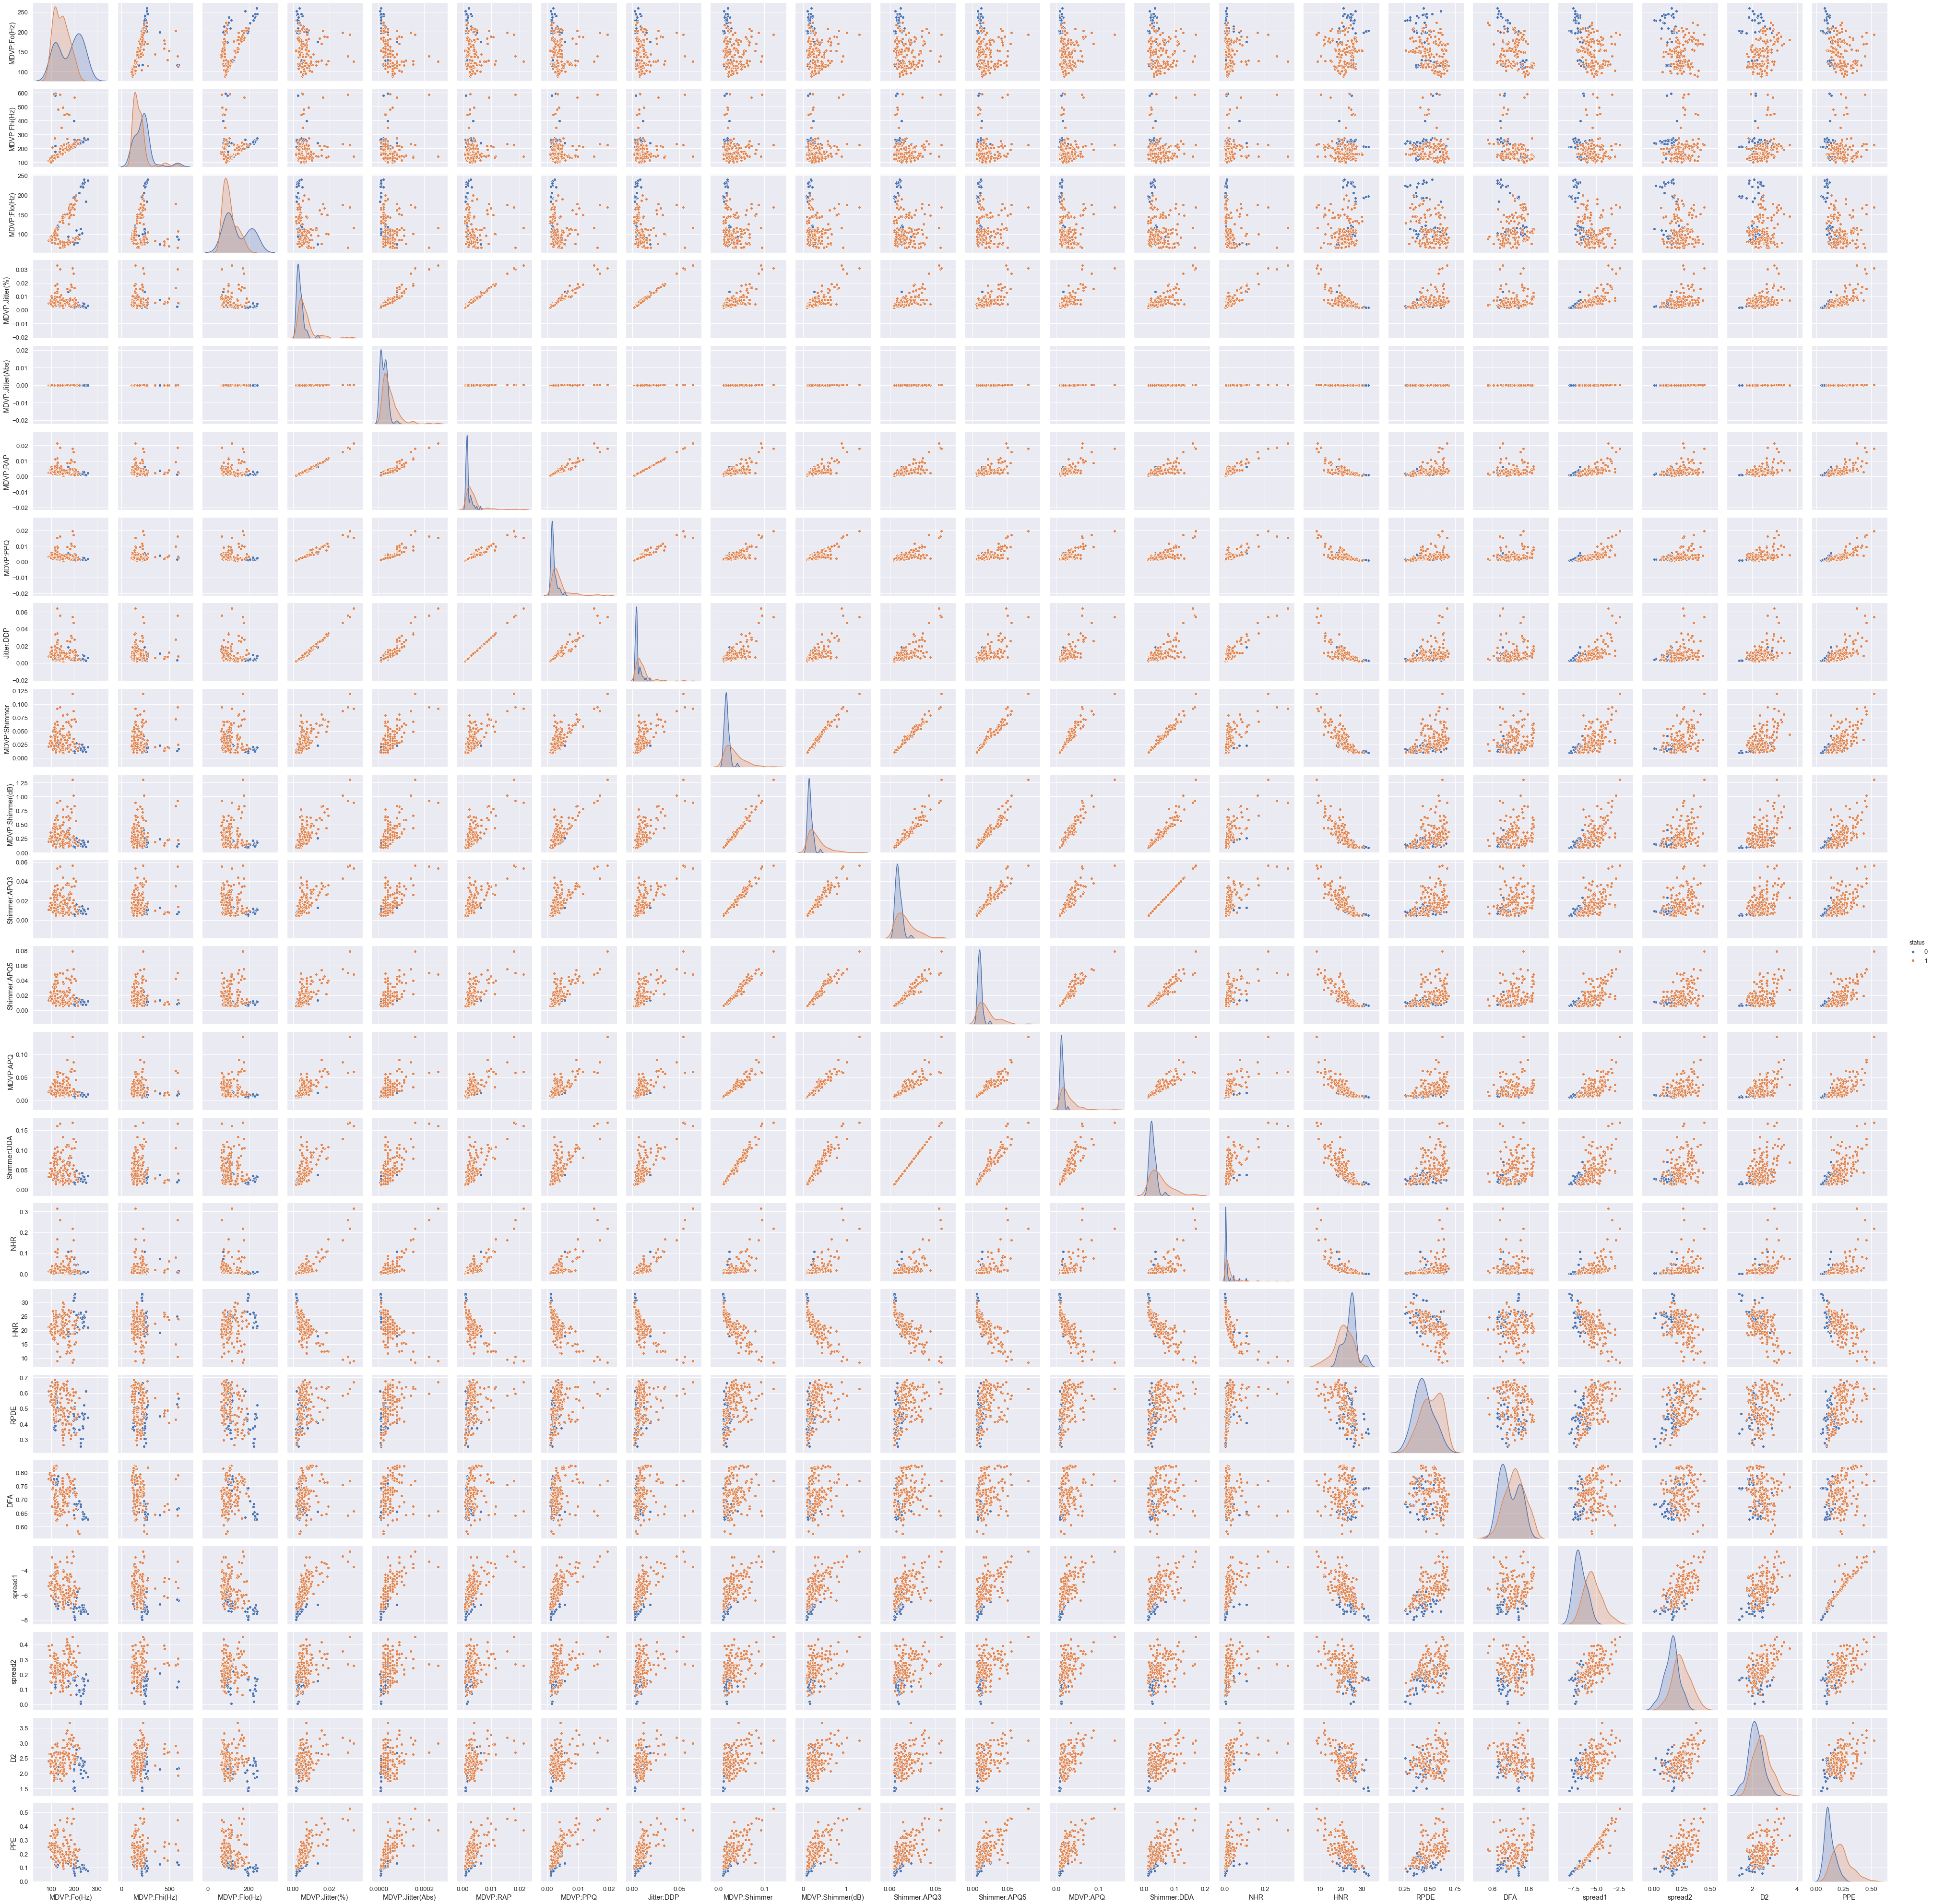

In [32]:
plt.figure(figsize = (40,40))
sns.set(font_scale=1.2)
sns.pairplot(data_bkup,hue='status',diag_kind='kde')

#### *As we can see from the above, the correlation between the STATUS column & other features is very poor. It seems none of the features are a strong predictor of the STATUS. This might impact the score of our models*

#### *Since none of the features are a STRONG predictor, we can try polynomial models (quadratic)*

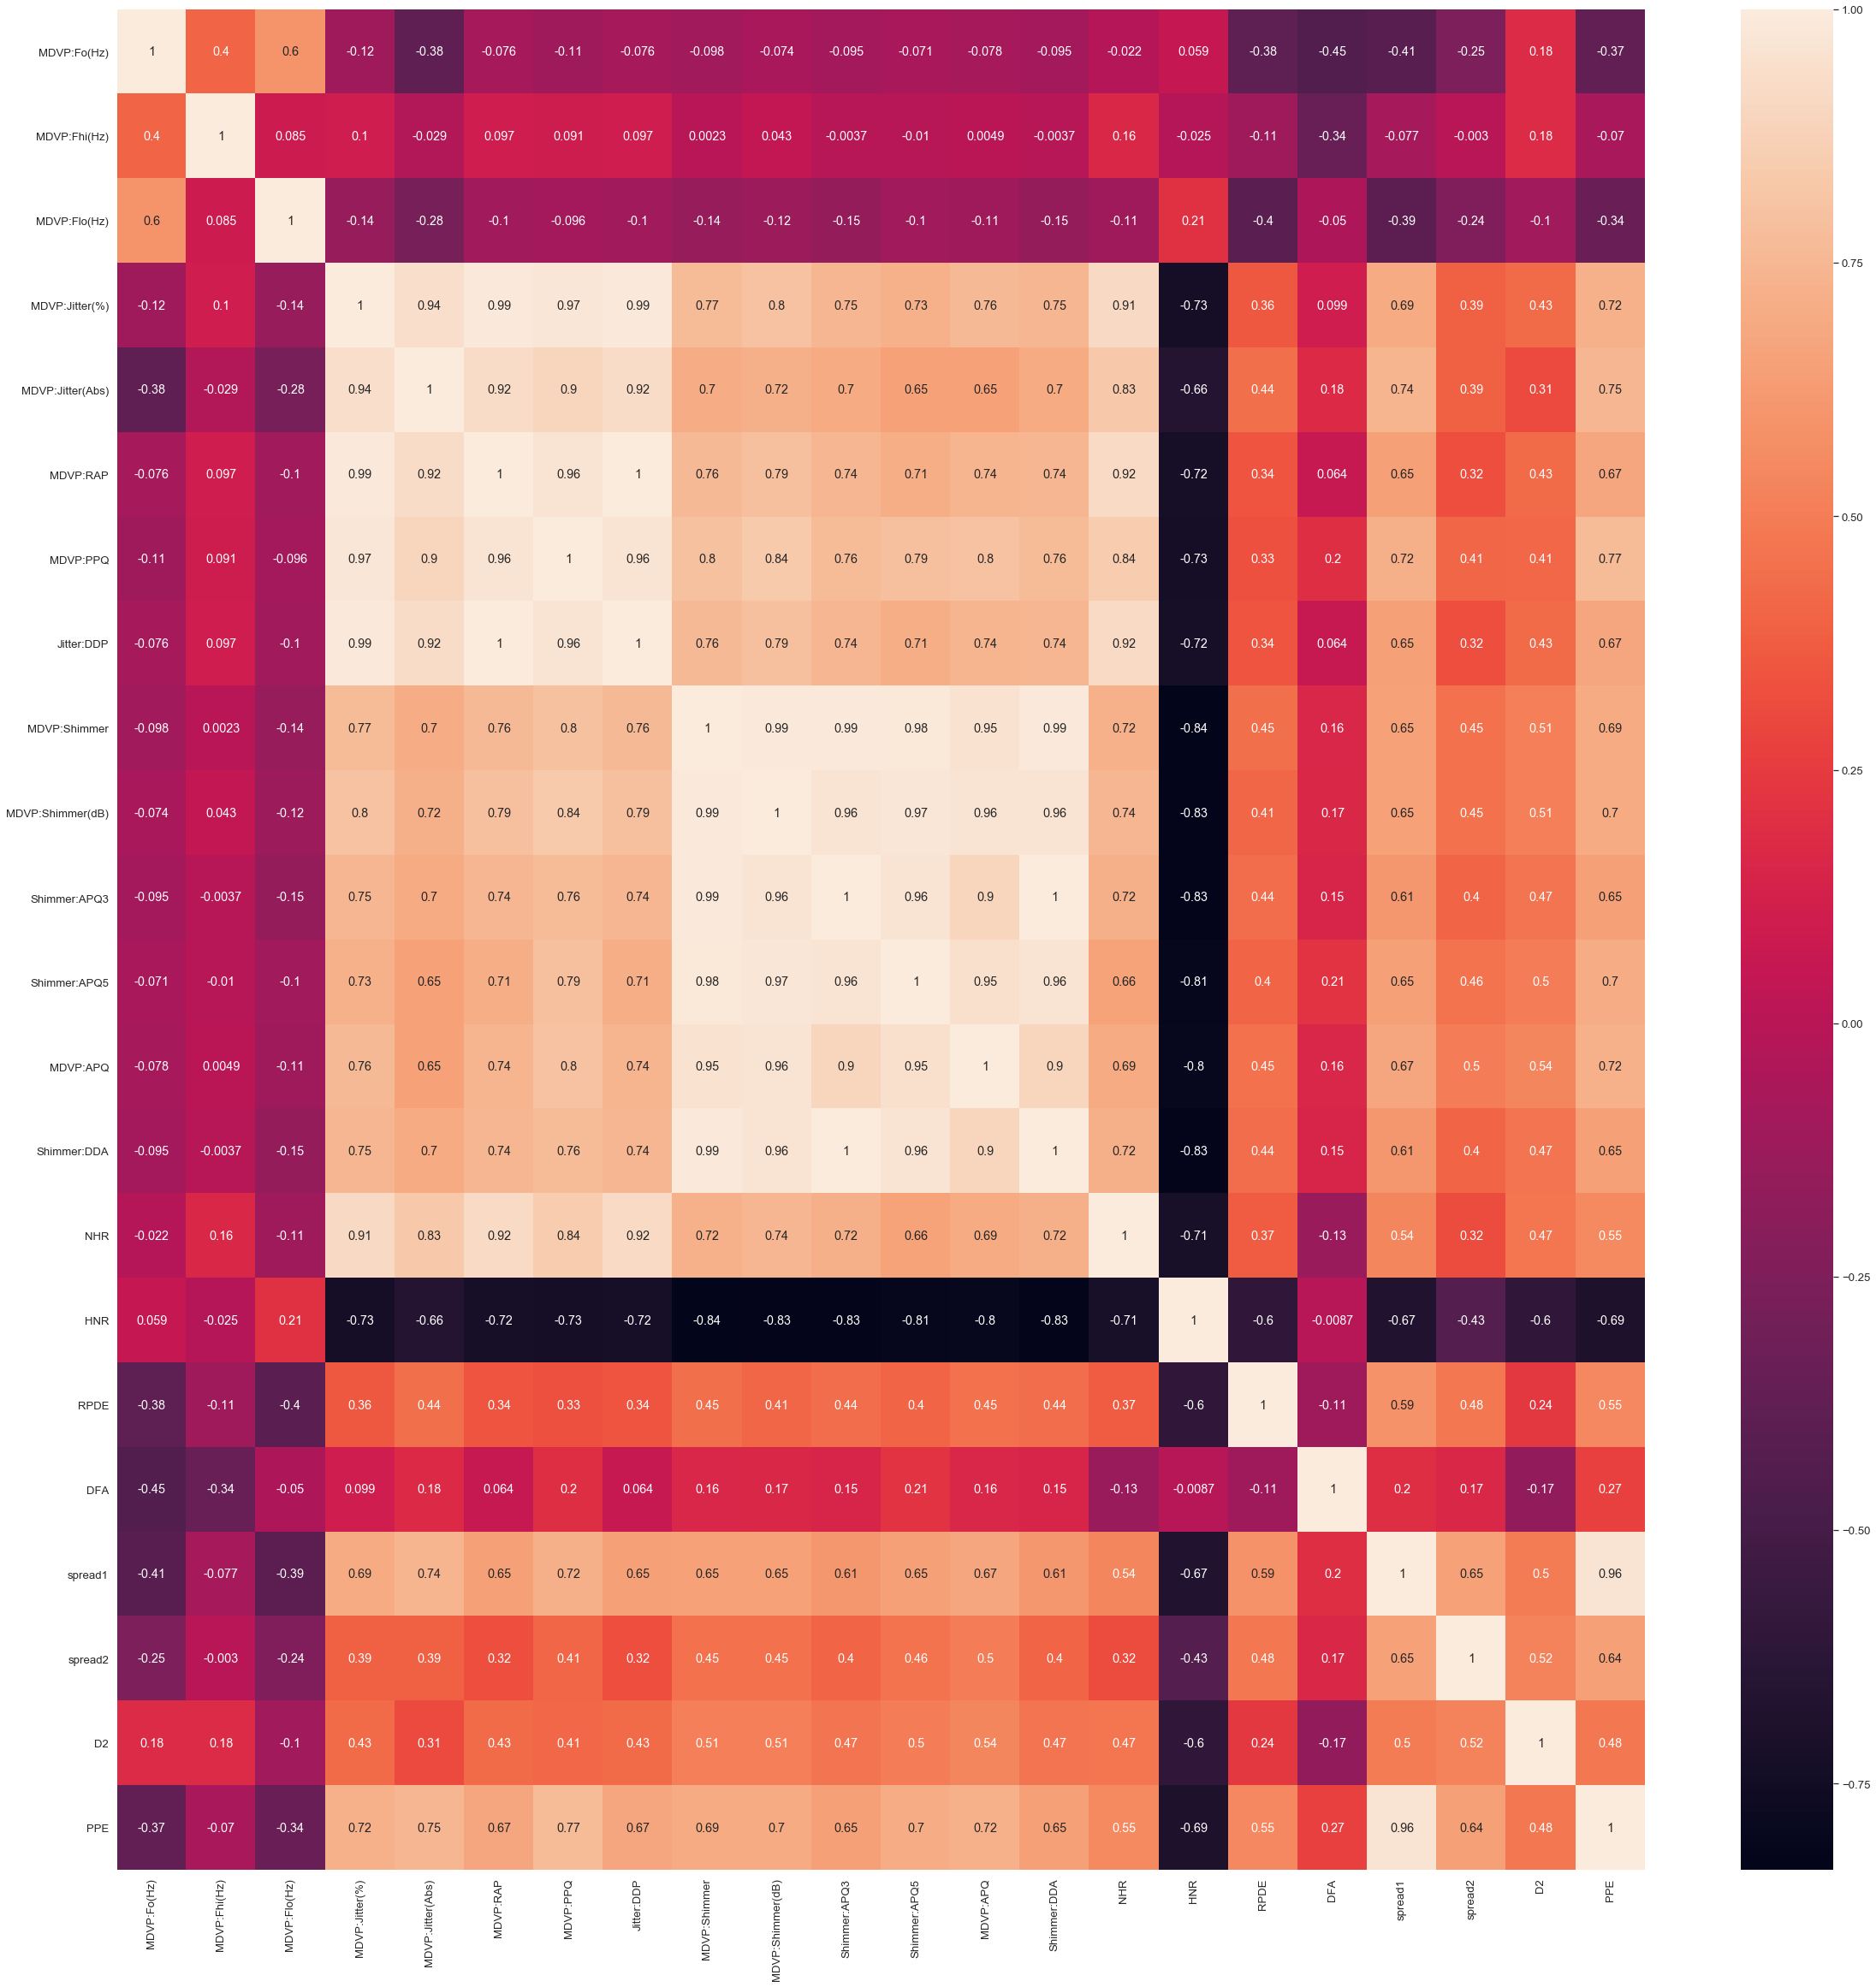

In [33]:
plt.figure(figsize = (40,40))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot = True)

#### *As we can see from the above, there are several highly correlated variables. This is something that we have seen earlier also wherein when we did EDA for each of the individual features, we saw similar trends across multiple features. In order to make our model simpler & easier to understand, we should drop these correlated variables, so as to avoid MULTI-COLLINEARITY*

#### *From our overall EDA, we can see that none of the features are strong predictors for the the target variable. The distribution between the HEALTHY people & PATIENTS are almost identical for all features, with strong overlaps. Moreover, some of the features exhibit strong collinearity between themselves and break the basic assumption of features being independent. All of these collectively will impact our models performance & scores*

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.3,random_state=1)

### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [35]:
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=1)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

Test Accuracy for Fully Grown Decision Tree,using criterion=ENTROPY is:  0.864406779661017
Confusion Matrix: 
 [[12  7]
 [ 1 39]]


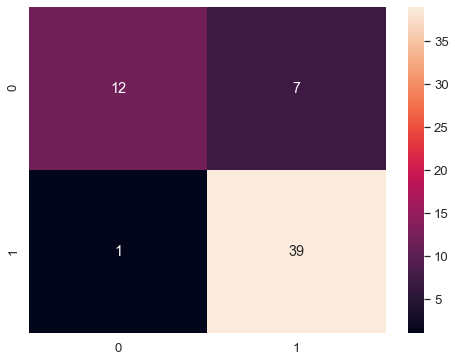

In [36]:
y_pred_test = dt_model.predict(X_test)
print ('Test Accuracy for Fully Grown Decision Tree,using criterion=ENTROPY is: ',metrics.accuracy_score(y_test,y_pred_test))

#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_test))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot = True)

In [37]:
#Viewing the classification report
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



In [38]:
#Getting the feature importances from the Decision Tree Classifier
Feature_importance = pd.DataFrame(data = dt_model.feature_importances_, index = list(X_train.columns), columns=['Importance_Score'])
#Resetting index
Feature_importance.reset_index(inplace = True)
#Renaming index as features
Feature_importance.rename(columns = {'index' : 'Features'}, inplace = True)
#Sorting by feature importance and showing the top 10 features
Feature_importance.sort_values(by = 'Importance_Score', ascending=False).head(10)

Features  Importance_Score
21           PPE          0.387263
0    MDVP:Fo(Hz)          0.219150
13   Shimmer:DDA          0.106000
1   MDVP:Fhi(Hz)          0.099800
20            D2          0.079409
17           DFA          0.067644
7     Jitter:DDP          0.040734
2   MDVP:Flo(Hz)          0.000000
19       spread2          0.000000
18       spread1          0.000000

#### *Based on the above list of importatnt features, and our earlier EDA, we should remove the below features, as they have a high correlation with Jitter:DDP (which is an important feature)*

1. MDVP:Jitter(Abs)
2. MDVP:RAP
3. MDVP:PPQ
4. MDVP:Jitter(%)
5. NHR

#### *Similarly, we should drop the below features, as they have a high correlation with Shimmer:DDA*
1. MDVP:Shimmer(dB)    
2. Shimmer:APQ3        
3. Shimmer:APQ5        
4. MDVP:APQ            
5. MDVP:Shimmer  

In [39]:
#Dropping the above redundant features & re-checking for model accuracy
X_train.drop(columns=['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Jitter(%)','NHR','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','MDVP:Shimmer'],inplace=True)
X_test.drop(columns=['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Jitter(%)','NHR','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','MDVP:Shimmer'],inplace=True)

In [40]:
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=1)
dt_model.fit(X_train,y_train)
y_pred_test = dt_model.predict(X_test)
print ('Test Accuracy for Fully Grown Decision Tree,using criterion=ENTROPY is: ',metrics.accuracy_score(y_test,y_pred_test))

#Viewing the classification report
print(metrics.classification_report(y_test,y_pred_test))

Test Accuracy for Fully Grown Decision Tree,using criterion=ENTROPY is:  0.864406779661017
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



#### *Thus even after regularization, the model accuracy & performance has not been impacted*

### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [ ]:
#Creating a validation set as we want to validate the model after tuning, before taking it to Test data
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [42]:
#Applying Grid-Search to find the max_depth & min_sample_leaf
param_grid_dt = {'max_depth':range(5,15),'min_samples_leaf': range(1,20)}
n_folds=5
dtree=DecisionTreeClassifier(criterion='entropy',random_state=1)
grid_search = GridSearchCV(estimator=dtree,param_grid=param_grid_dt,cv=n_folds,verbose=1,n_jobs=10,scoring='recall')

In [43]:
grid_search.fit(X_train_,y_train_)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 931 out of 950 | elapsed:    8.1s remaining:    0.2s
[Parallel(n_jobs=10)]: Done 950 out of 950 | elapsed:    8.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'max_depth': range(5, 15),
                         'min_samples_leaf': range(1, 20)},
             p

In [44]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.8631578947368421
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
{'max_depth': 5, 'min_samples_leaf': 3}


In [45]:
#Validating the above hyper-paramters on the validation set
dt_model_cv = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=1)
dt_model_cv.fit(X_train,y_train)
y_pred_val = dt_model_cv.predict(X_val)
print ('Accuracy for 5-Level Decision Tree, and min_samples_leaf=3,using criterion=ENTROPY during Validation is: ',metrics.accuracy_score(y_val,y_pred_val))

Accuracy for 5-Level Decision Tree, and min_samples_leaf=3,using criterion=ENTROPY during Validation is:  0.9024390243902439


Accuracy for 5-Level Decision Tree, and min_samples_leaf=5,using criterion=ENTROPY during Testing is:  0.8983050847457628
Confusion Matrix: 
 [[15  4]
 [ 2 38]]


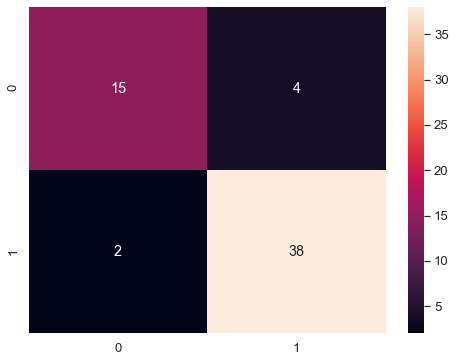

In [47]:
#Since we are satisfied with the performance of the model on validation set, we proceed to run the model on test data
y_pred_test = dt_model_cv.predict(X_test)
print ('Accuracy for 5-Level Decision Tree, and min_samples_leaf=5,using criterion=ENTROPY during Testing is: ',metrics.accuracy_score(y_test,y_pred_test))

#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_test))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot = True)

In [48]:
#Viewing the classification report
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



#### *As we can see from above, with feature selection, the model accuracy didn't improve much, but the overall model became much simpler & interpretable. Advantage of such feature selection is that in situations like the one at hand, where the number of dimensions is quiet large compared to the number of datapoints, it helps in reducing the number of dimensions to a manageable number. This increases the overall model simplicity, and reduces chances of over-fitting & large variance errors. However in the process, model accuracy takes a hit at times*

#### *In our case, we reduced the number of features from 21 to 11(almost half) by removing 10 redundant features. This didn't impact the model accuracy much. On top of the same, we applied hyper-parameter tuning & utilised Grid-Search CV to determine the best value of min_sample_leaf & max_depth for our DecisionTreeClassifier.*

#### *With these parameters, our model accuracy improved & the F1-score also improved. However, as our data is skewed towards PATIENTS (status=1), our F1-score for PATIENTS is much more for than that for HEALTHY people*

#### *Lastly, the weighted avg. score across PRECISION, RECALL & F1-SCORE, for both the classes is IDENTICAL*

### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.3,random_state=1)

In [50]:
rfcl = RandomForestClassifier(criterion='entropy',random_state=1)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [51]:
y_pred_test_rfcl = rfcl.predict(X_test)
print ('Testing Accuracy for DEFAULT RandomForestClassifier is: ',metrics.accuracy_score(y_test,y_pred_test_rfcl))

Testing Accuracy for DEFAULT RandomForestClassifier is:  0.8305084745762712


Confusion Matrix: 
 [[15  4]
 [ 2 38]]


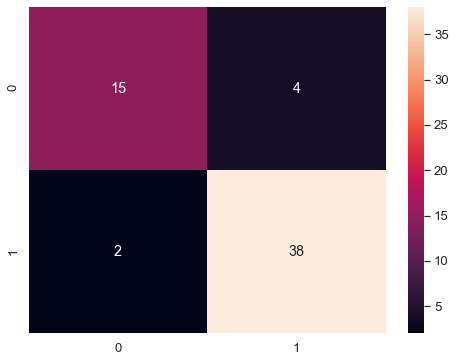

In [52]:
#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_test_rfcl))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test_rfcl), annot = True)

In [53]:
#Viewing the classification report
print (metrics.classification_report(y_test,y_pred_test_rfcl))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



In [54]:
#Getting the feature importances from the Decision Tree Classifier
Feature_importance = pd.DataFrame(data = rfcl.feature_importances_, index = list(X_train.columns), columns=['Importance_Score'])
#Resetting index
Feature_importance.reset_index(inplace = True)
#Renaming index as features
Feature_importance.rename(columns = {'index' : 'Features'}, inplace = True)
#Sorting by feature importance and showing the top 10 features
Feature_importance.sort_values(by = 'Importance_Score', ascending=False).head(10)

Features  Importance_Score
21           PPE          0.116210
18       spread1          0.095102
0    MDVP:Fo(Hz)          0.082288
7     Jitter:DDP          0.058814
11  Shimmer:APQ5          0.053292
12      MDVP:APQ          0.050513
8   MDVP:Shimmer          0.050063
1   MDVP:Fhi(Hz)          0.048845
5       MDVP:RAP          0.047248
10  Shimmer:APQ3          0.045910

#### *Based on the above list of importatnt features, and our earlier EDA, we should remove the below features, as they have a high correlation with Jitter:DDP (which is an important feature)*

1. MDVP:Jitter(Abs)
2. MDVP:RAP
3. MDVP:PPQ
4. MDVP:Jitter(%)
5. NHR

#### *Similarly, we should drop the below features, as they have a high correlation with Shimmer:DDA*
1. Shimmer:APQ3        
2. Shimmer:APQ5 

In [55]:
#Dropping the above redundant features & re-checking for model accuracy
X_train.drop(columns=['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Jitter(%)','NHR','Shimmer:APQ3','Shimmer:APQ5'],inplace=True)
X_test.drop(columns=['MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Jitter(%)','NHR','Shimmer:APQ3','Shimmer:APQ5'],inplace=True)

In [56]:
rfcl = RandomForestClassifier(criterion='entropy',random_state=1)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [57]:
y_pred_test_rfcl = rfcl.predict(X_test)
print ('Testing Accuracy for DEFAULT RandomForestClassifier is: ',metrics.accuracy_score(y_test,y_pred_test_rfcl))

Testing Accuracy for DEFAULT RandomForestClassifier is:  0.8813559322033898


Confusion Matrix: 
 [[15  4]
 [ 2 38]]


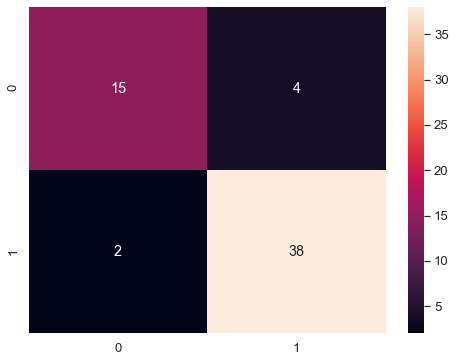

In [58]:
#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_test))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot = True)

In [59]:
#Viewing the classification report
print (metrics.classification_report(y_test,y_pred_test_rfcl))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



In [60]:
#Applying Grid-Search to find the optimal no. trees
rfcl = RandomForestClassifier(criterion='entropy',random_state=1)
n_folds=10
param_grid_rf = {'n_estimators':range(1,1000),'max_depth':range(1,100),'min_samples_leaf': range(1,100)}
rand_search = RandomizedSearchCV(estimator=rfcl,param_distributions=param_grid_rf,cv=n_folds,verbose=1,n_jobs=10,scoring='accuracy',random_state=1)

In [61]:
rand_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   26.3s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   58.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
           

In [62]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)
print(rand_search.best_params_)

best accuracy 0.926923076923077
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=245,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
{'n_estimators': 245, 'min_samples_leaf': 1, 'max_depth': 90}


In [66]:
y_pred_test_rfcl_cv = rand_search.predict(X_test)
print ('Accuracy for Tuned RandomClassifier using max_depth=90,min_samples_leaf=1,n_estimators=245: ',metrics.accuracy_score(y_test,y_pred_test_rfcl_cv))

Accuracy for Tuned RandomClassifier using max_depth=90,min_samples_leaf=1,n_estimators=245:  0.864406779661017


Confusion Matrix: 
 [[11  8]
 [ 0 40]]


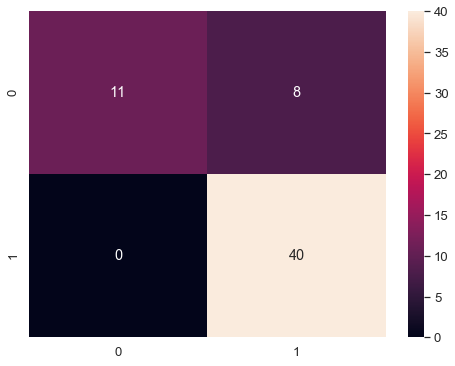

In [67]:
#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_test_rfcl_cv))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test_rfcl_cv), annot = True)

In [68]:
#Viewing the classification report
print(metrics.classification_report(y_test,y_pred_test_rfcl_cv))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.83      1.00      0.91        40

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



#### *The optimal number of trees, which provides a comparable o/p as the parameterized DecisionTree is: 245*

#### *The basic DecisionTreeClassifier gives an accuracy score of 86.44%. However, since the dataset is highly skewed towards PATIENTS (23 OUT OF 31), it will not be useful to simply look at the  ACCURACY score. We need to check our model performance at class level.*

#### *In this case, our model shows a: PRECISION of 92% for HEALTHY people, but only 85% for PATIENTS.  Conversely, the RECALL score is 97% for PATIENTS but is only 63% for HEALTHY people.*


#### *Thus the basic DecisionTreeClassifier is able to predict PATIENTS very well, but it also has a poor record of identifying HEALTHY people as PATIENTS.*

#### *When we apply FEATURE SELECTION & HYPER-PARAMETER TUNING to this basic DecisionTreeClassifier, we obtain a much better & balanced results across both the classes. The refined model now shows a: PRECISION of 90% for HEALTHY people, and 88% for PATIENTS.  Conversely, the RECALL score is 95% for PATIENTS but is only 79% for HEALTHY people.*

#### *We see that although our RECALL score for HEALTHY people has improved a lot, the same for PATIENTS has not fallen drastically. The model has shown small improvement for PRECISION, for PATIENTS and has shown small fall for HEALTHY people.*

#### *Thus this tuned model is now capable of both predicting PATIENTS well & has also shown improvement in not wrongly classifying HEALTHY people as PATIENTS.*

----------------------------------------------------------------------------------------------------------------------

#### *The default RandomForestClassifier shows a magical figure of 1 for PRECISION of HEALTHY people, & RECALL of PATIENTS. However, the RECALL score for HEALTHY people was low (63%). Thus this model too suffered from the problem of being able to classify PATIENTS as patients very well, but also classified HEALTHY people as PATIENTS very often.*

#### *When we applied FEATURE SELECTION on this model, by removing some redundant features, the model performance improves substantially & thus we proceed with this reduced set of features. We then proceeded towards tuning our model by playing with HYPER-PARAMETERS only.* 

#### *When we proceed for the same, the model performance took a drastic hit, with PRECISION for HEALTHY people falling to 81% from the earlier 91%. The same for PATIENTS fell from 100% to 91%. Similarly, RECALL for HEALTHY people fell to 53% from 79%, and that for PATIENTS fell from 100% to 97%.*

#### *Thus our model fell from a VERY GOOD detector of both PATIENTS & HEALTHY people, to an average detector of PATIENTS & HEALTHY people*